# Binary Classification Model for Competition Data

This notebook will perform the following steps:
1. Load and preprocess the data from each dataset folder (`X_train.csv`, `y_train.csv`, `X_test.csv`).
2. Conduct feature engineering and visualize the data.
3. Train a neural network model for binary classification.
4. Evaluate model performance using accuracy, precision, and F1 score.
5. Save predictions to `y_predict.csv` for each dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns



# Set the main directory path
main_dir = '../Competition_data'

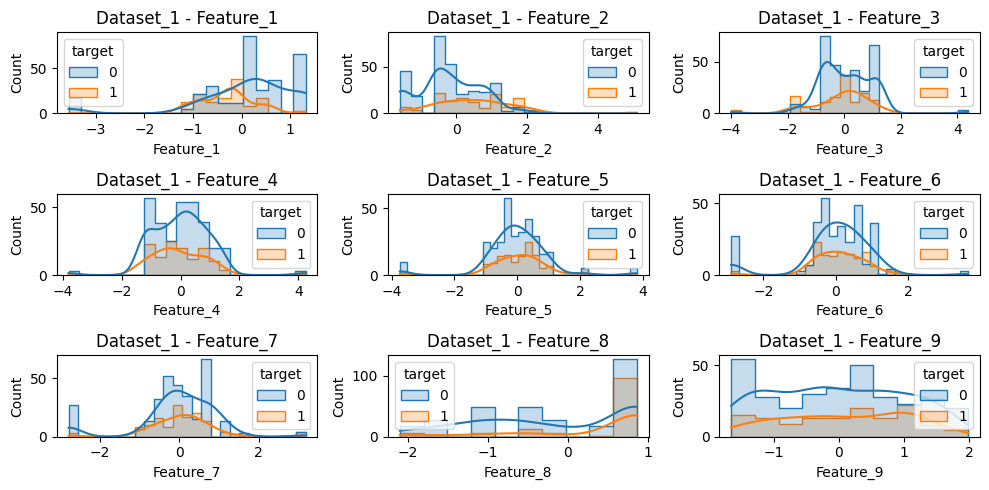

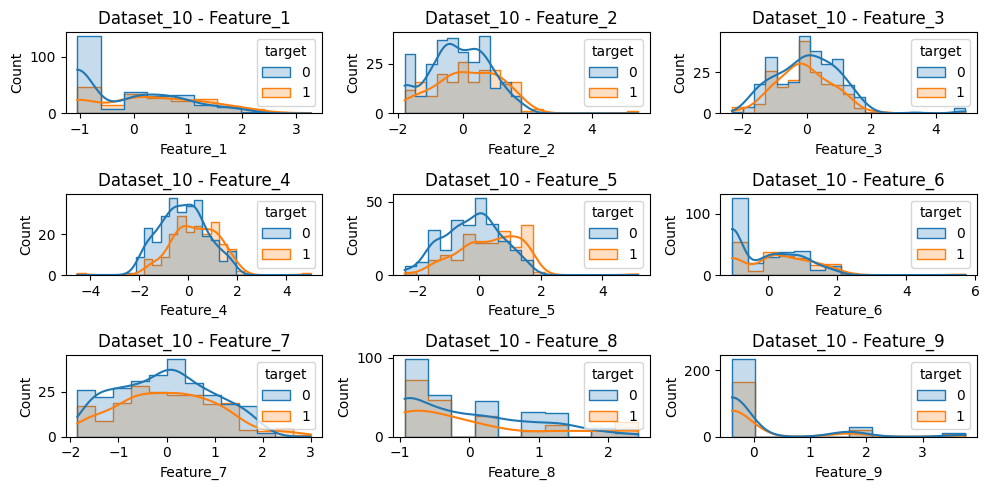

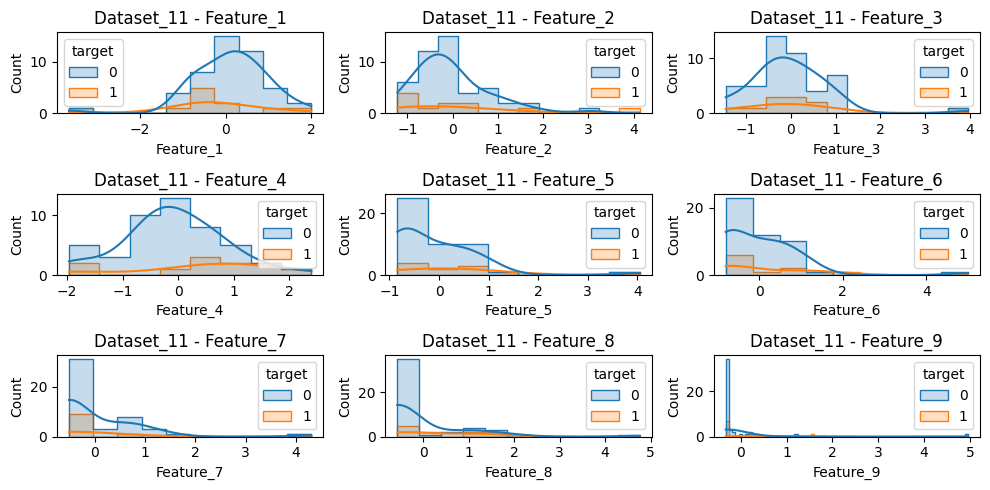

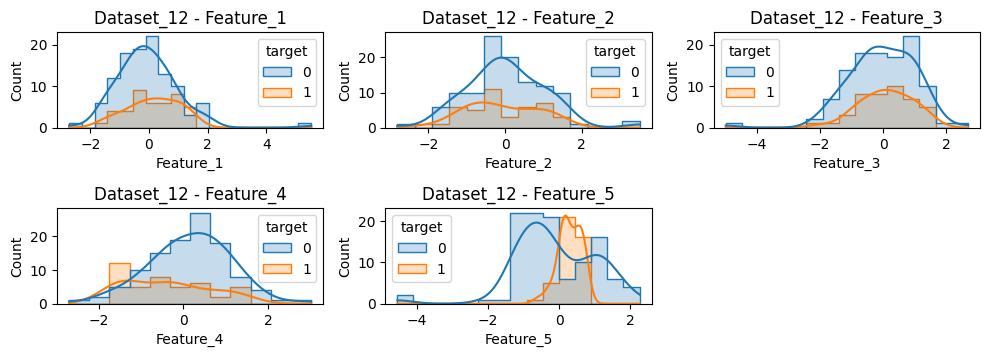

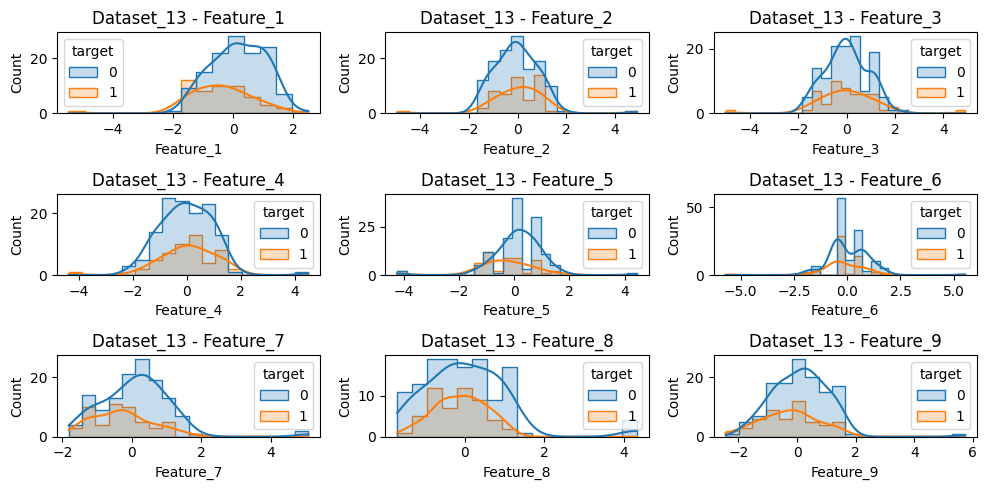

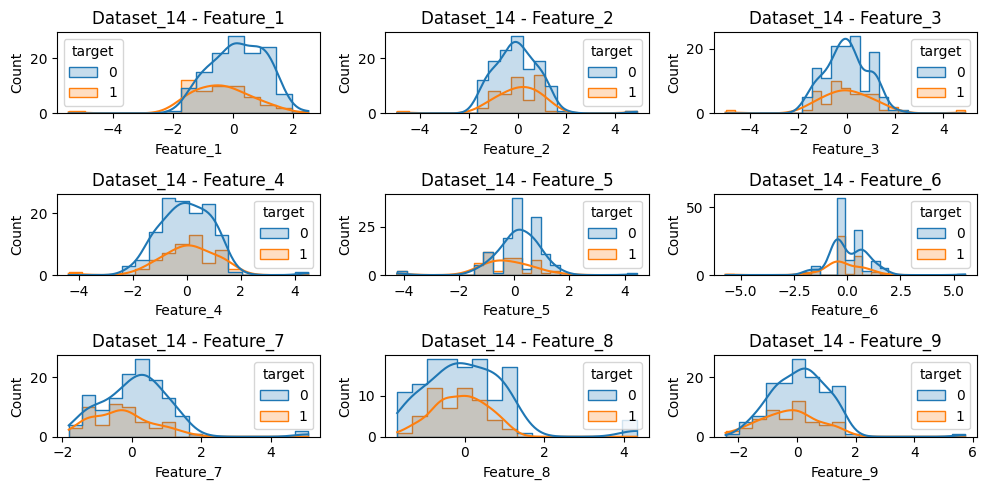

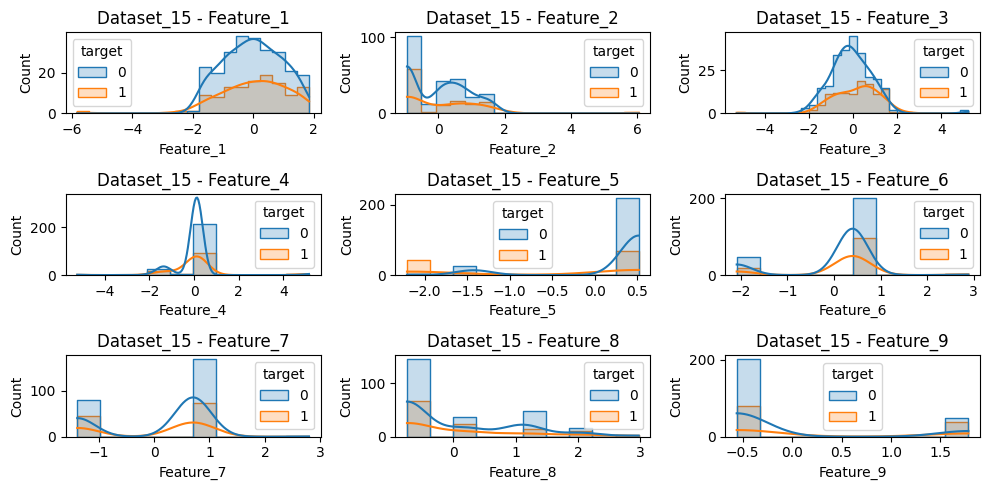

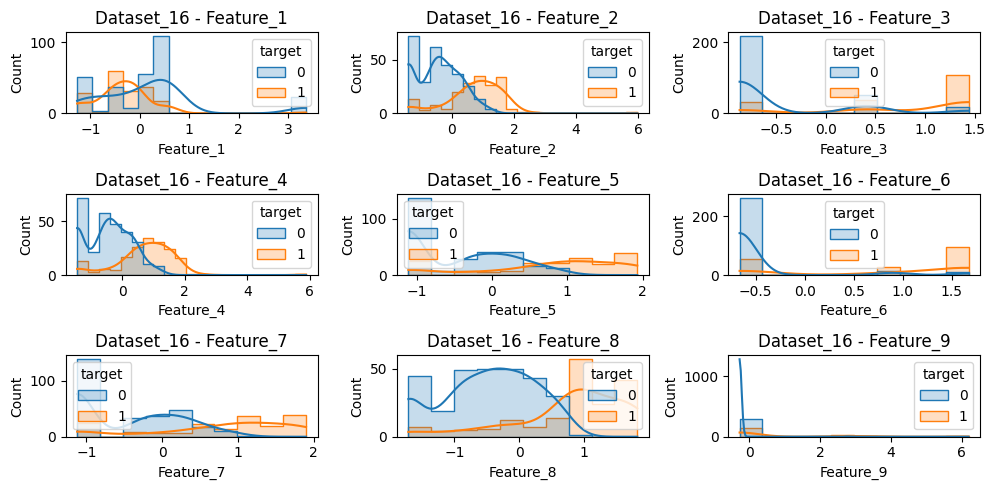

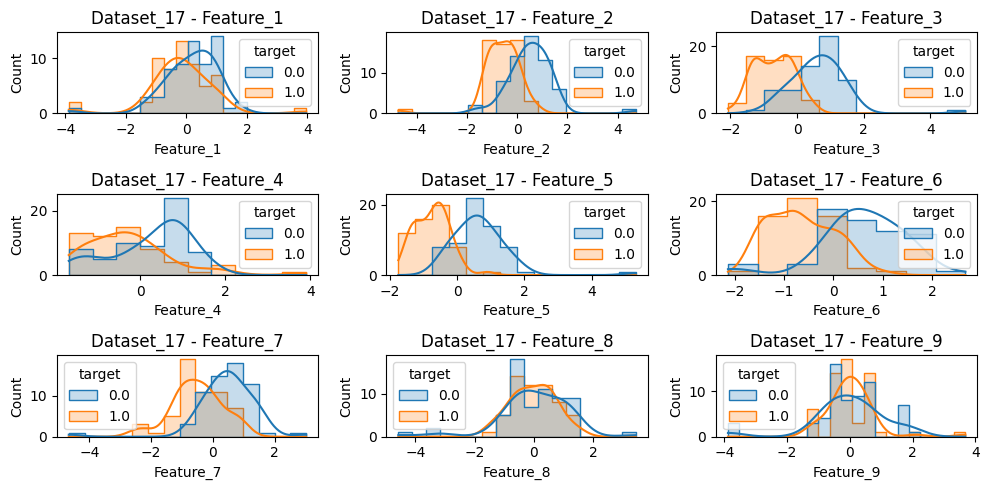

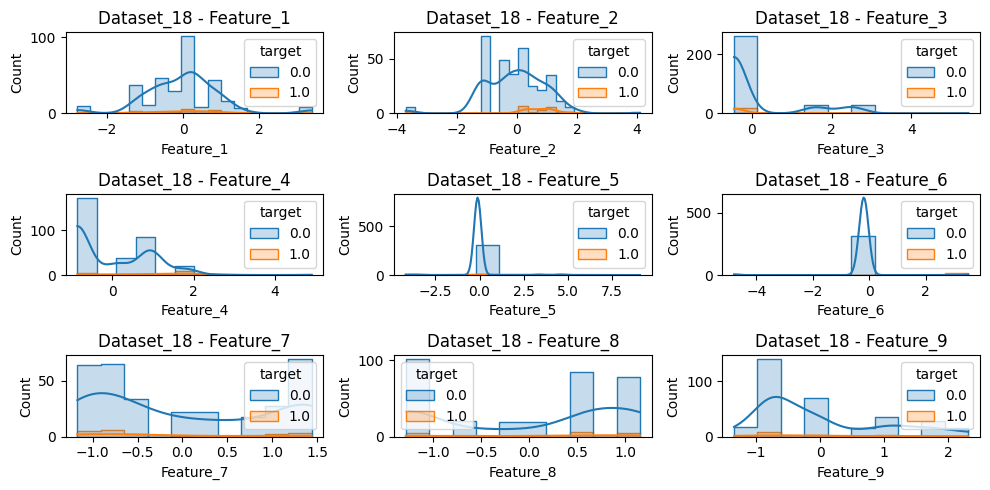

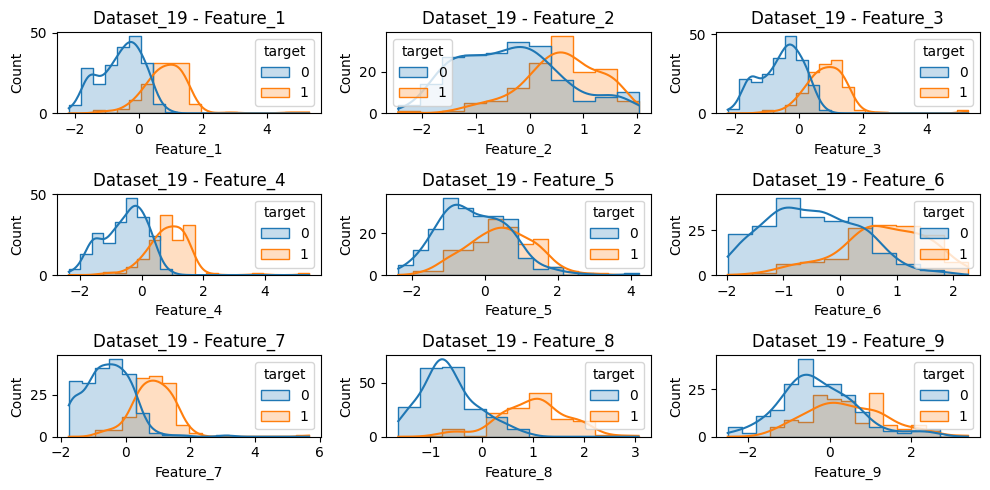

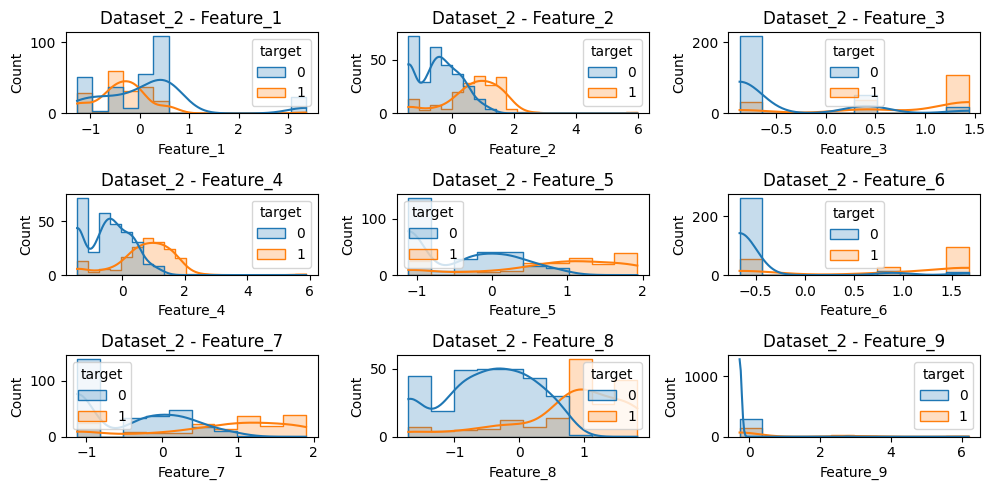

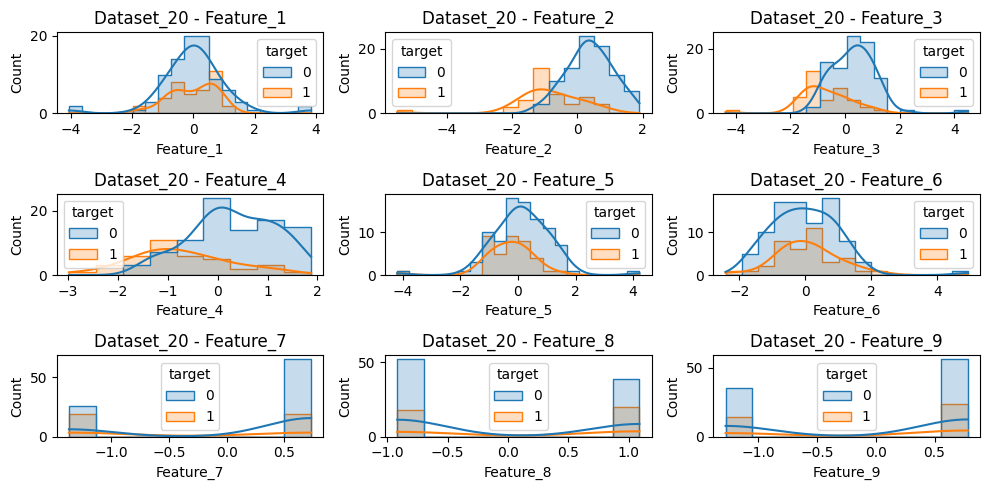

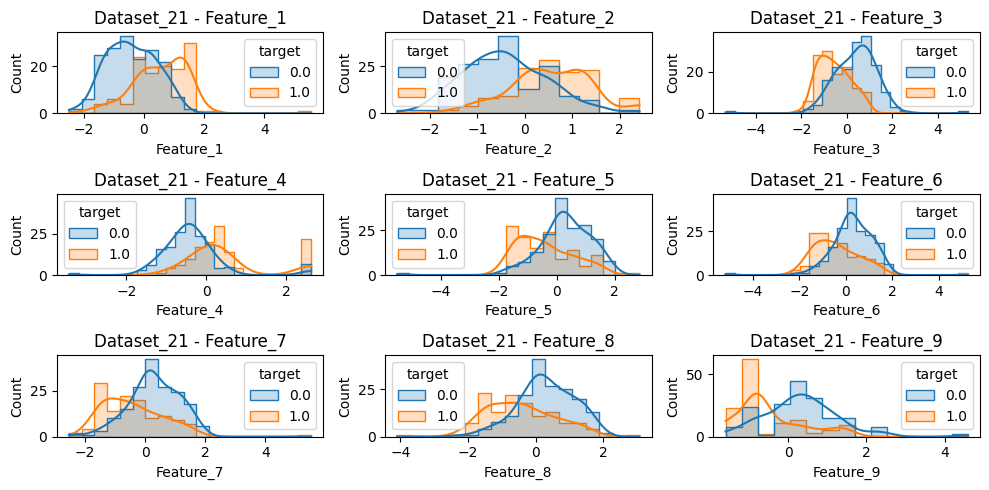

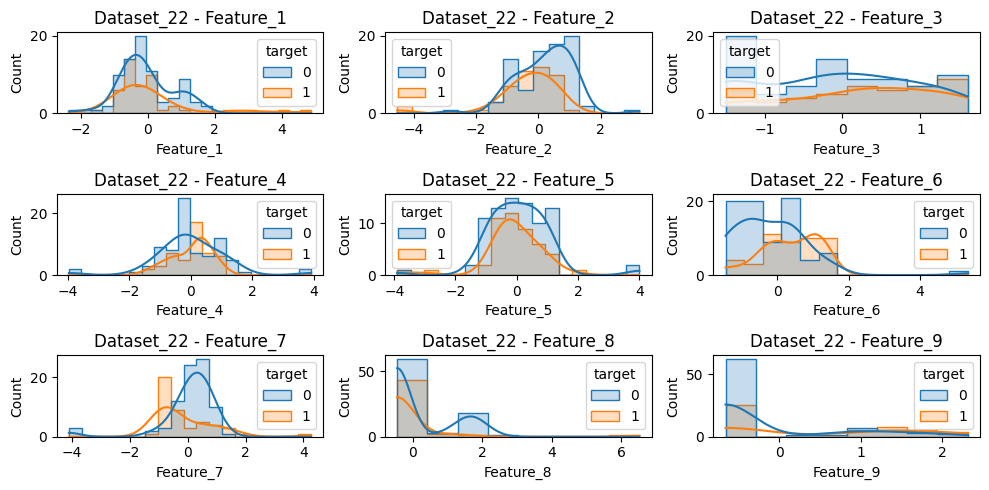

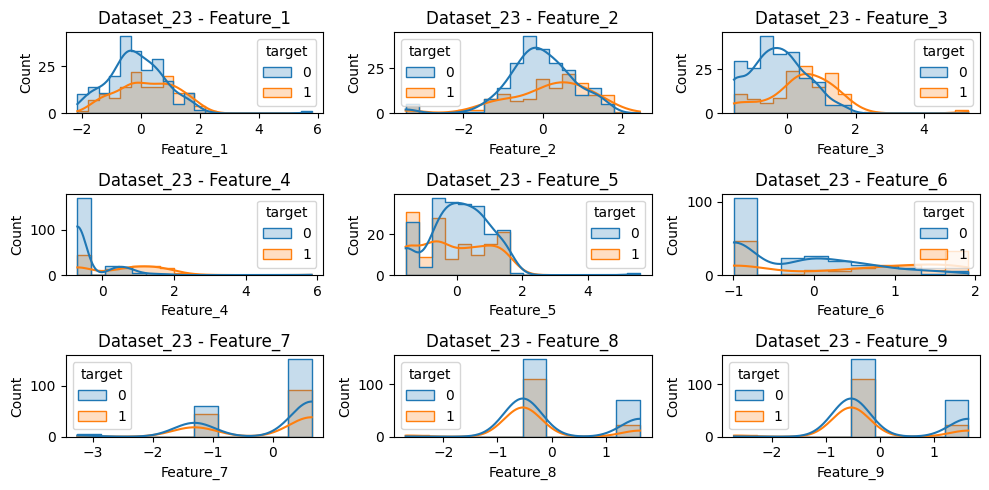

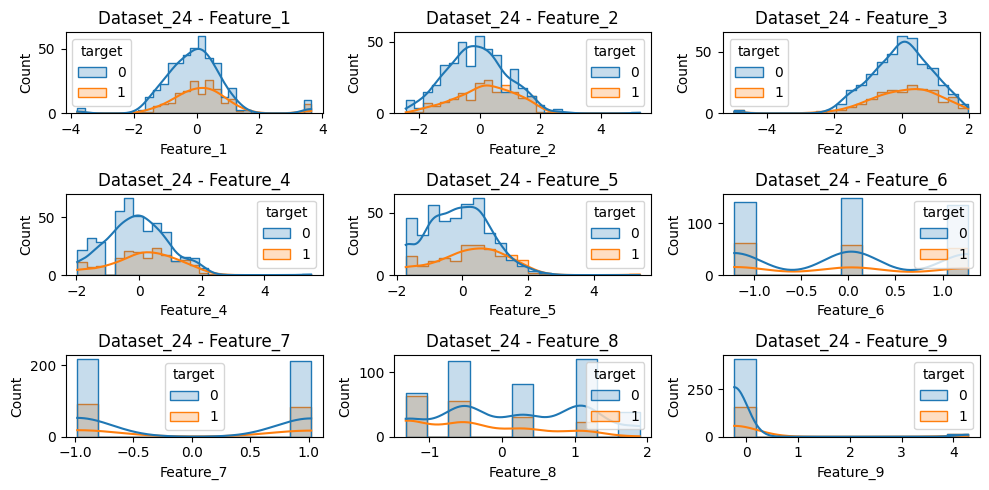

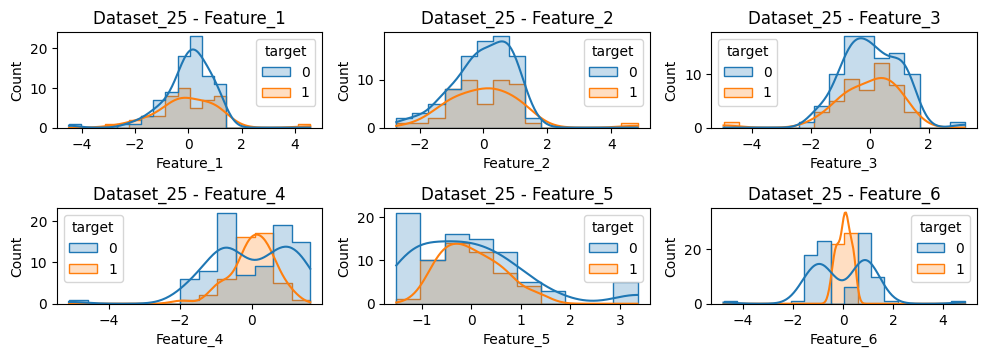

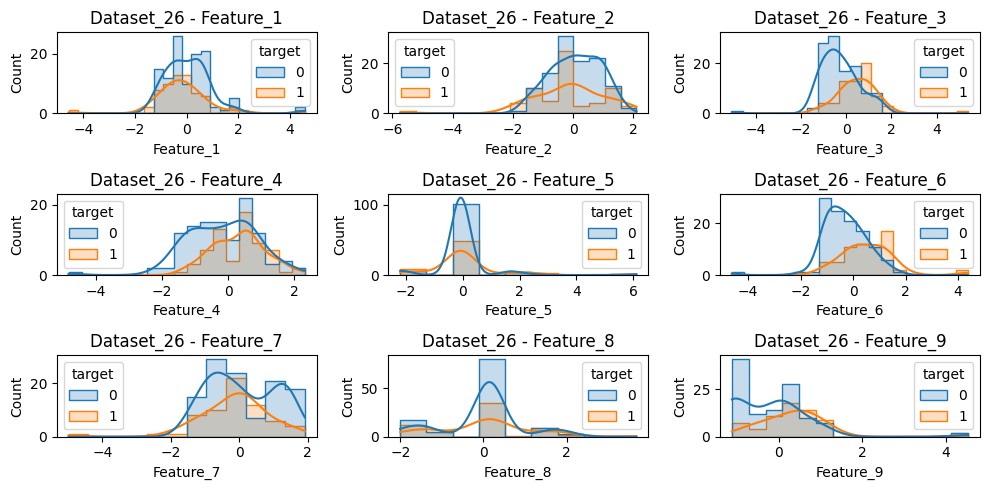

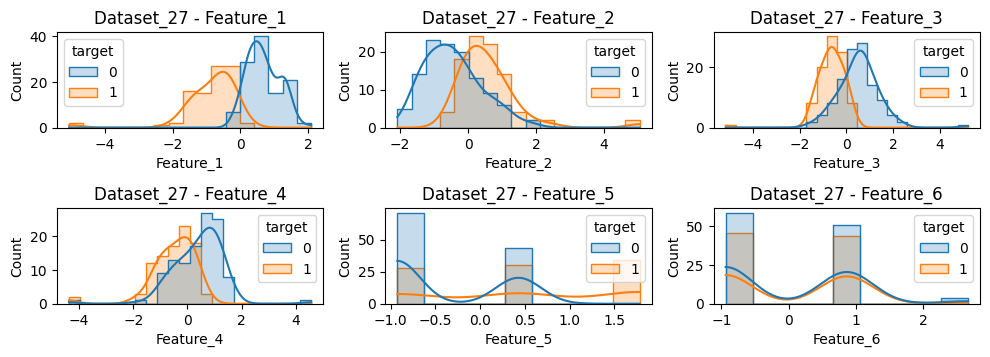

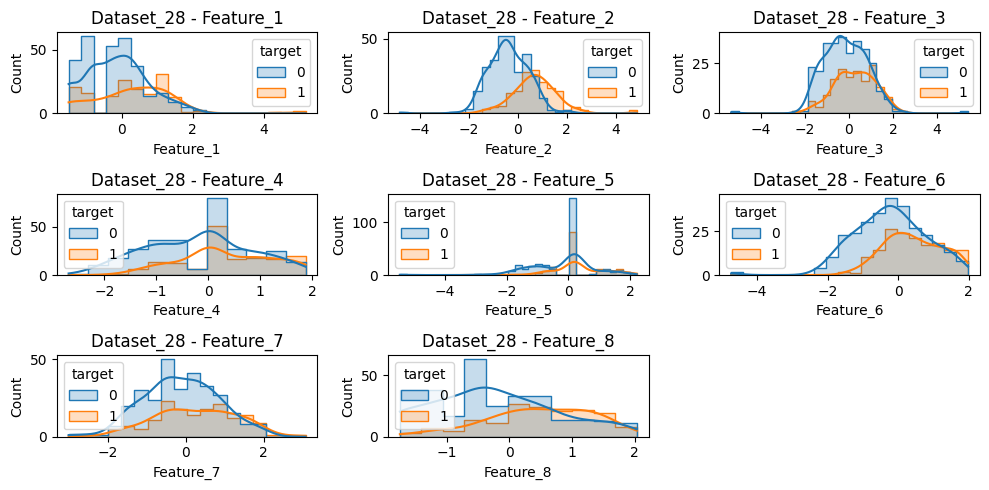

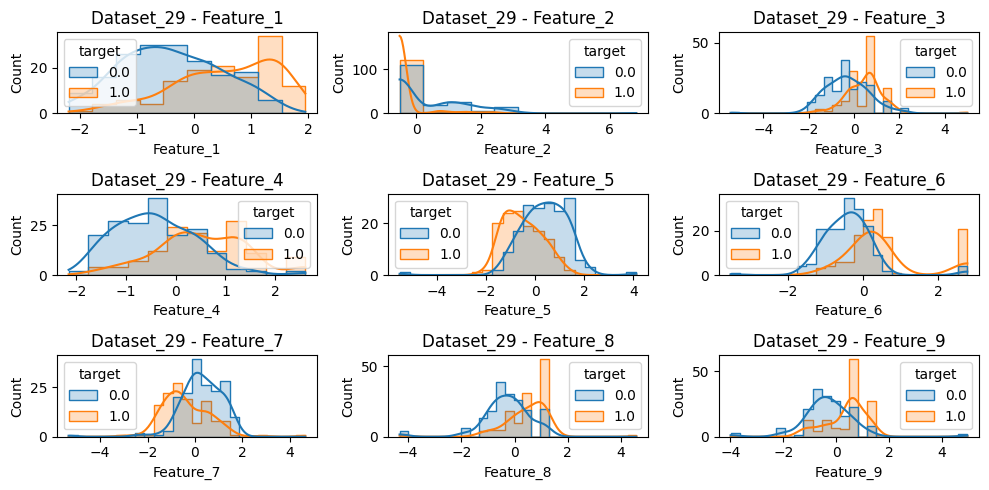

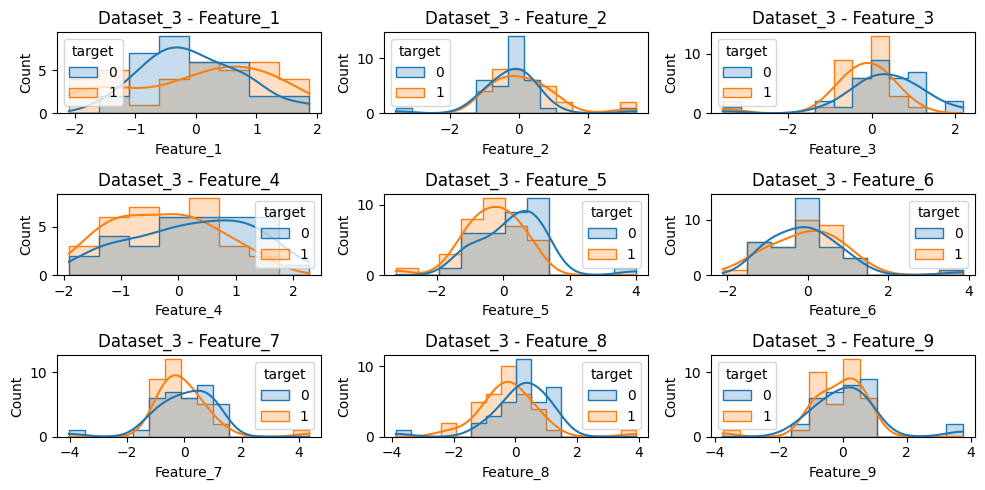

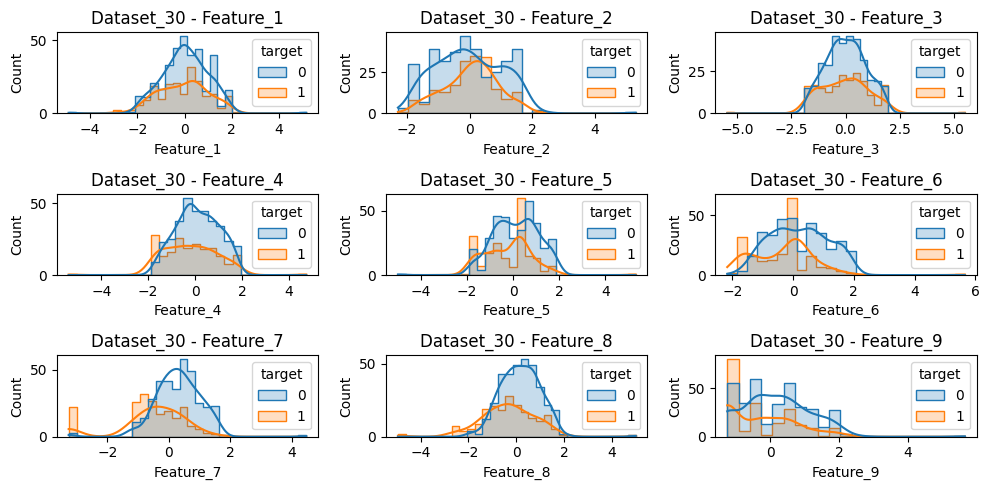

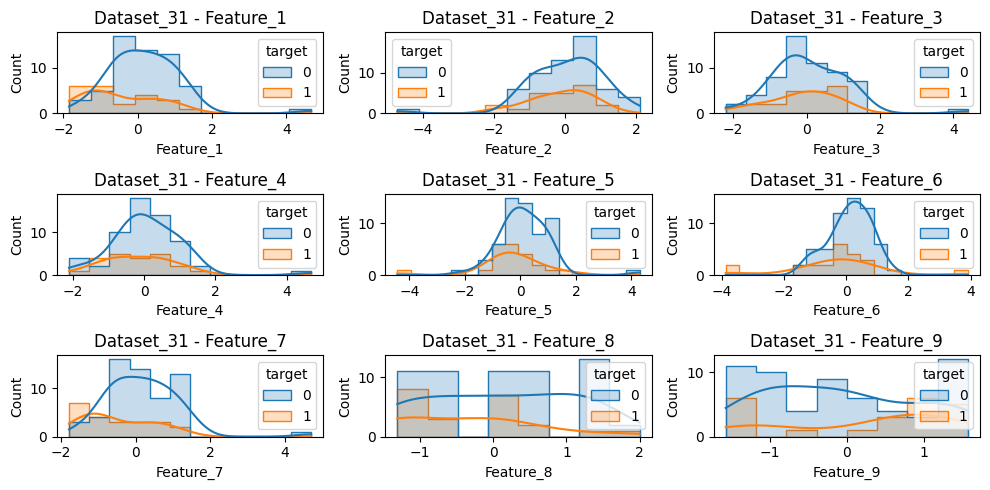

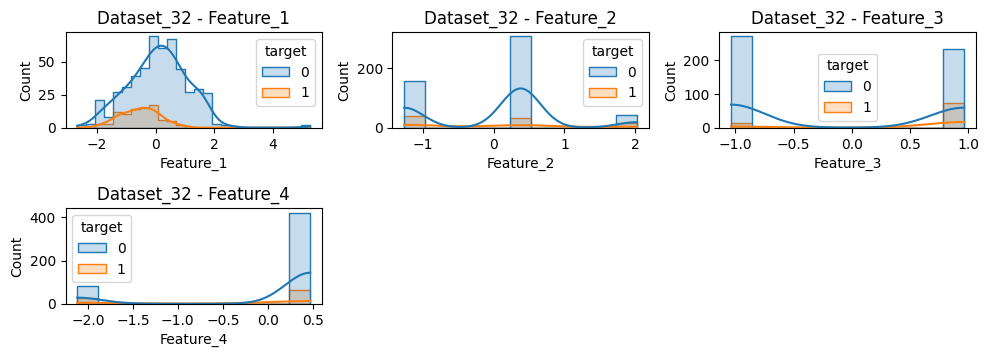

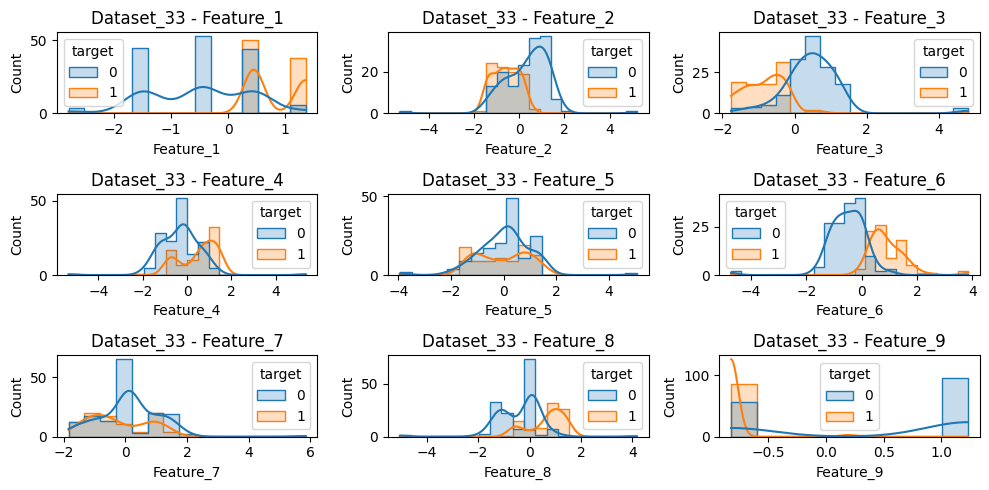

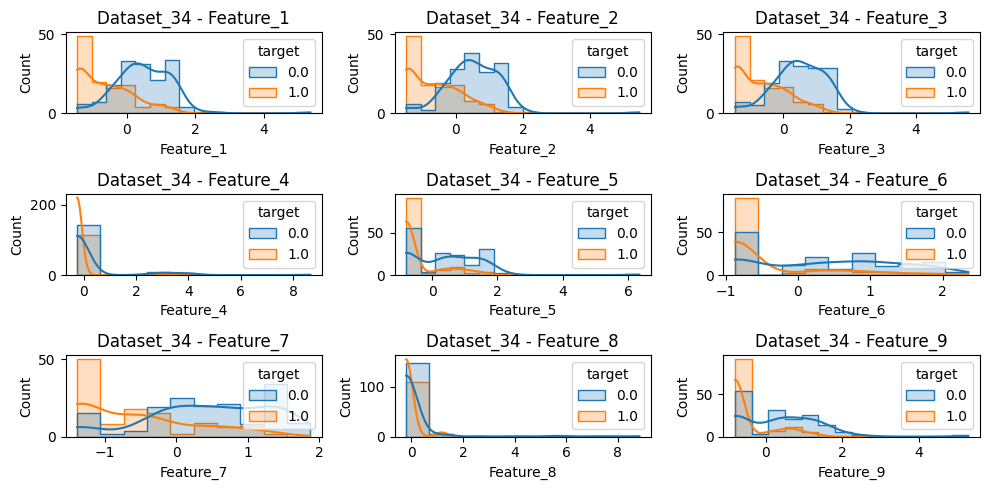

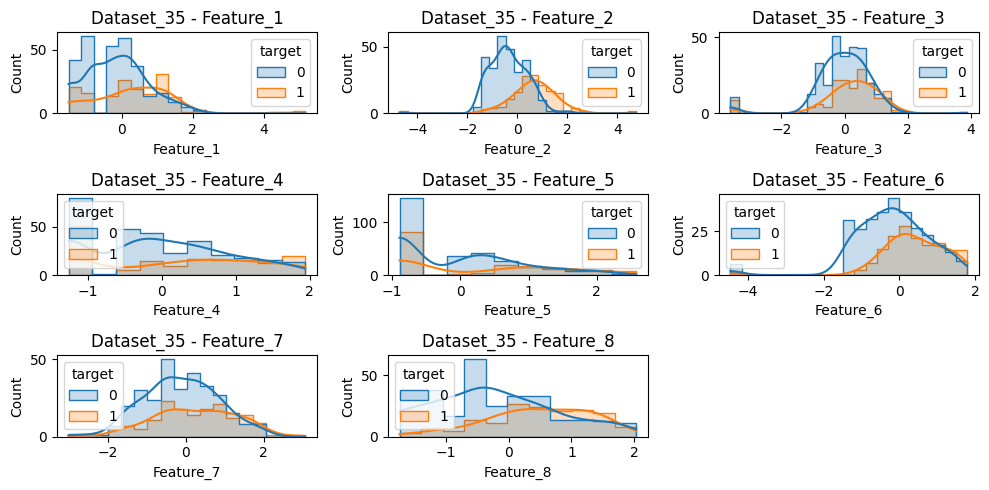

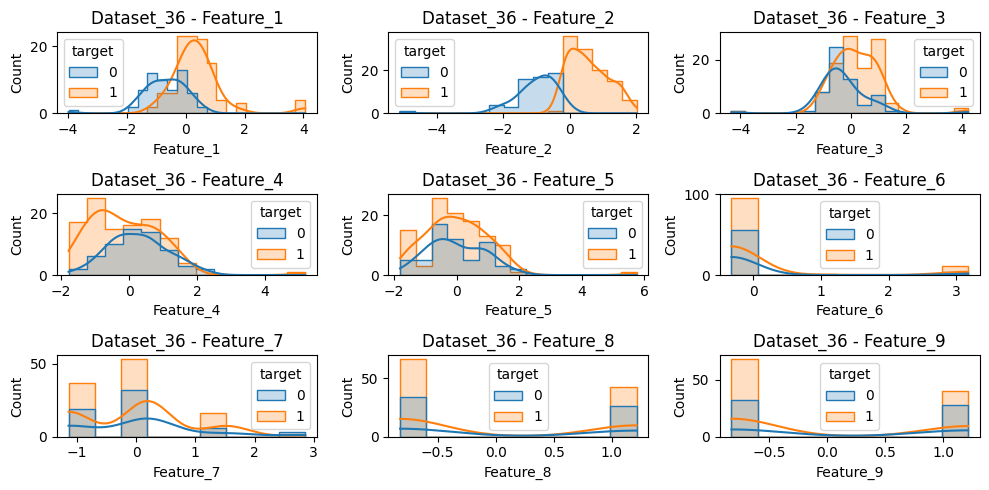

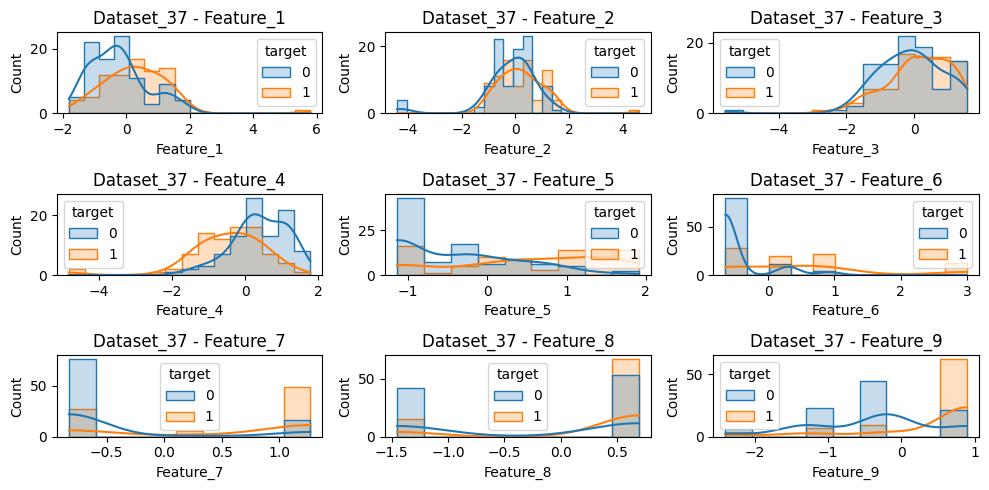

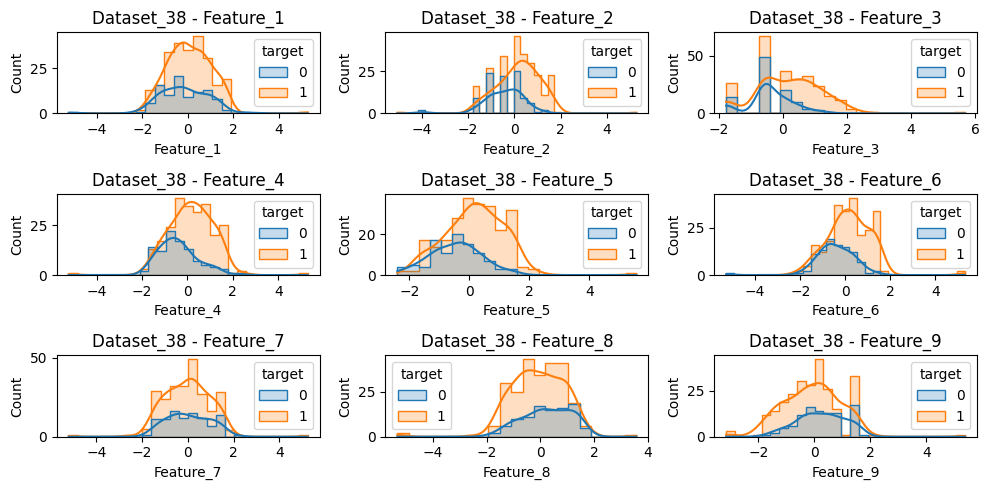

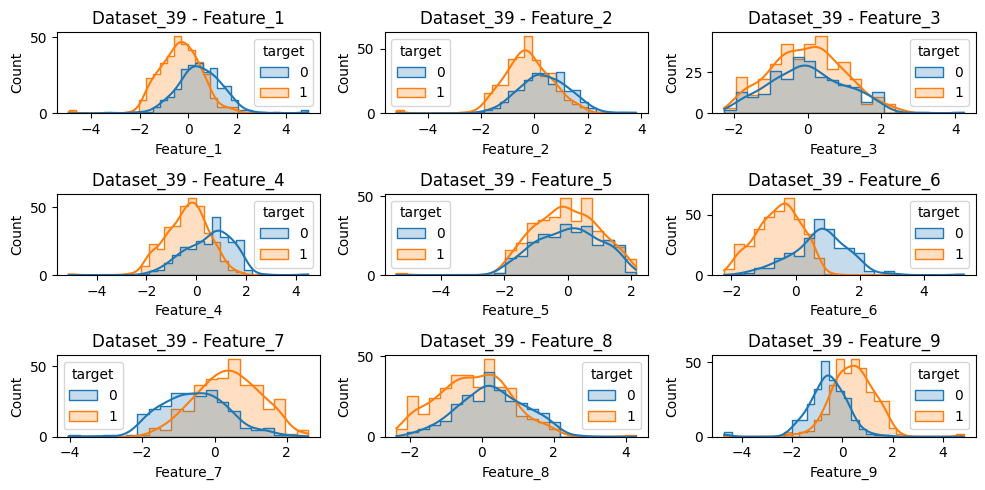

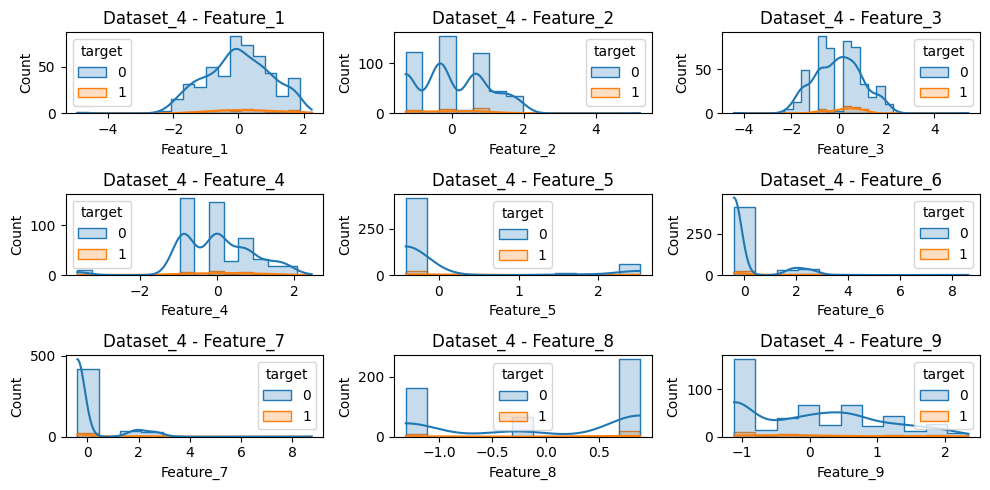

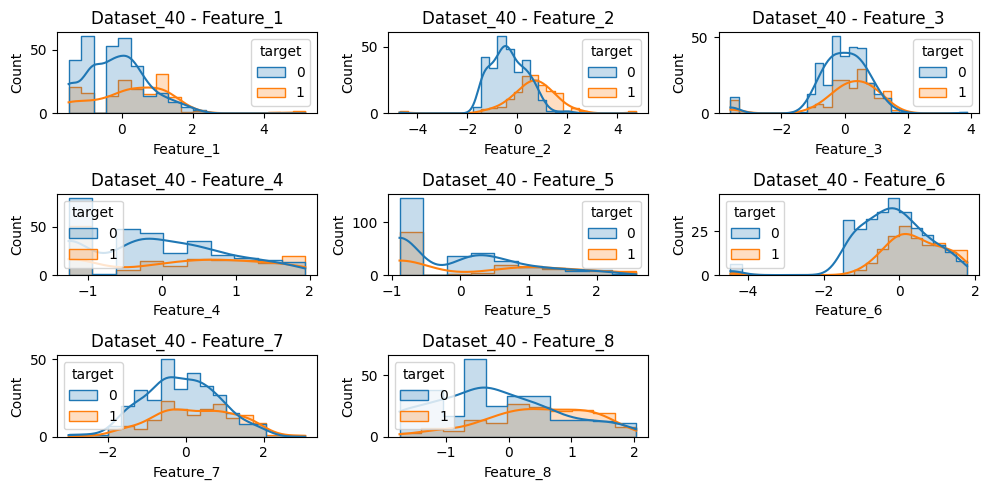

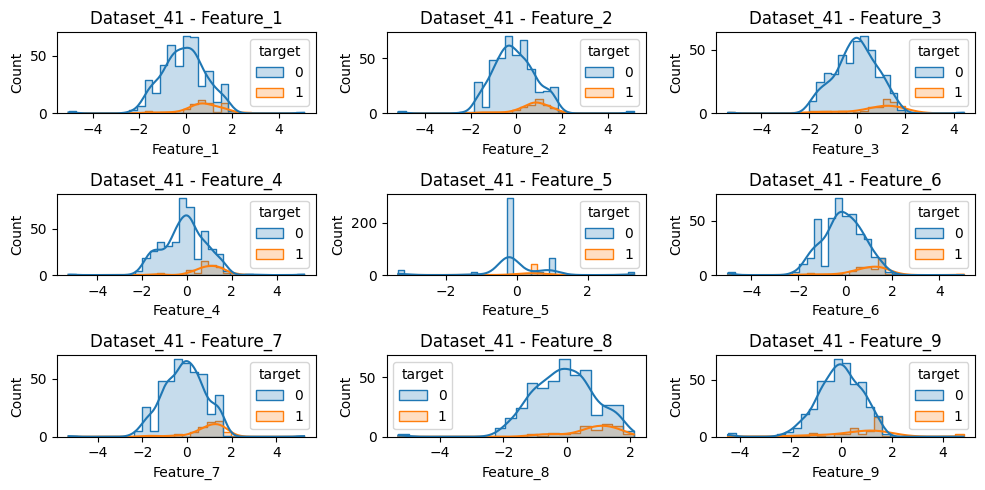

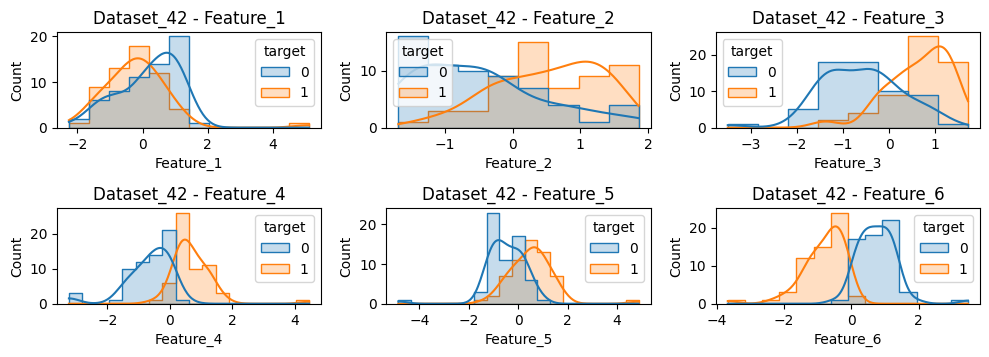

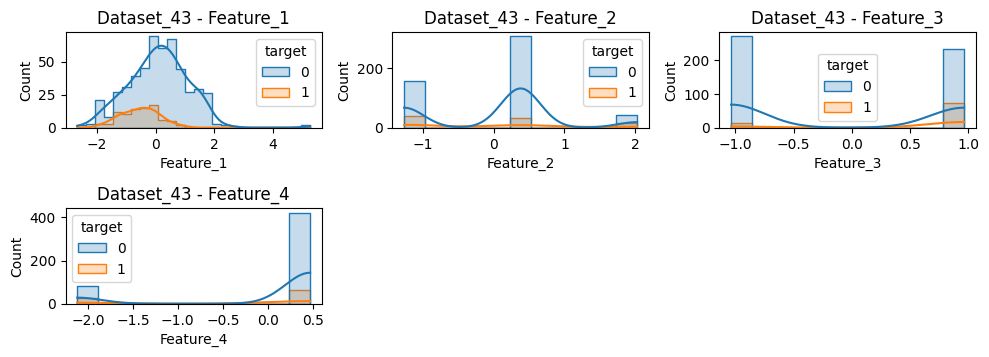

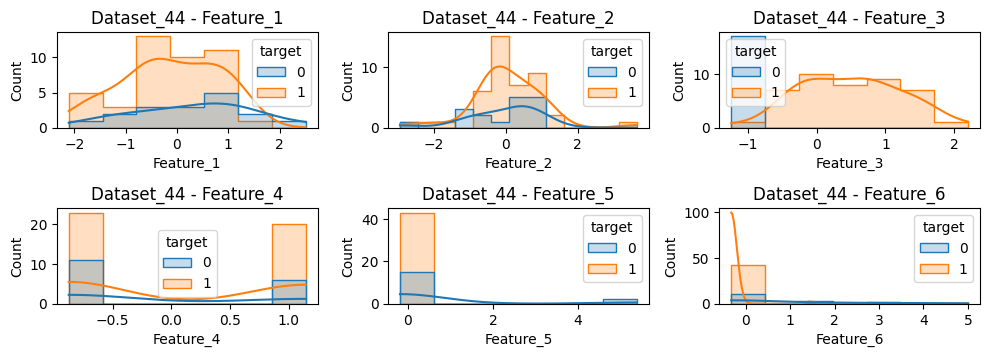

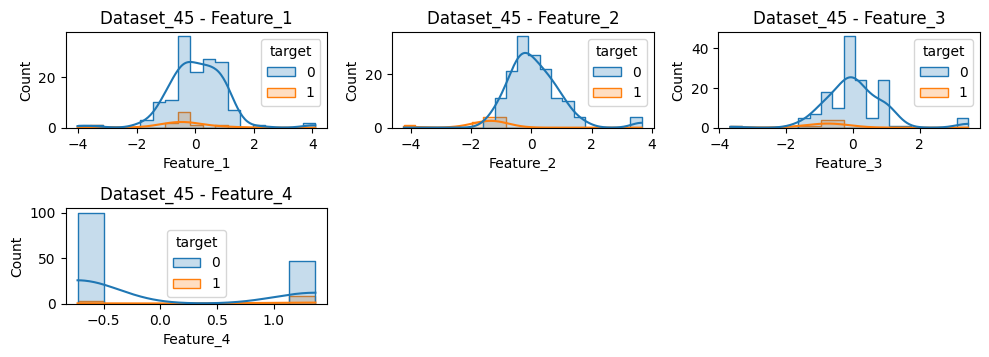

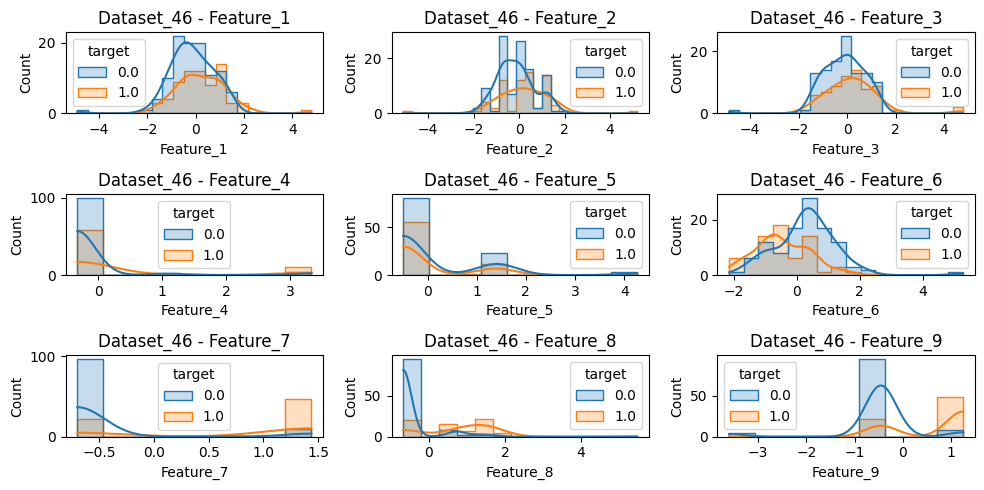

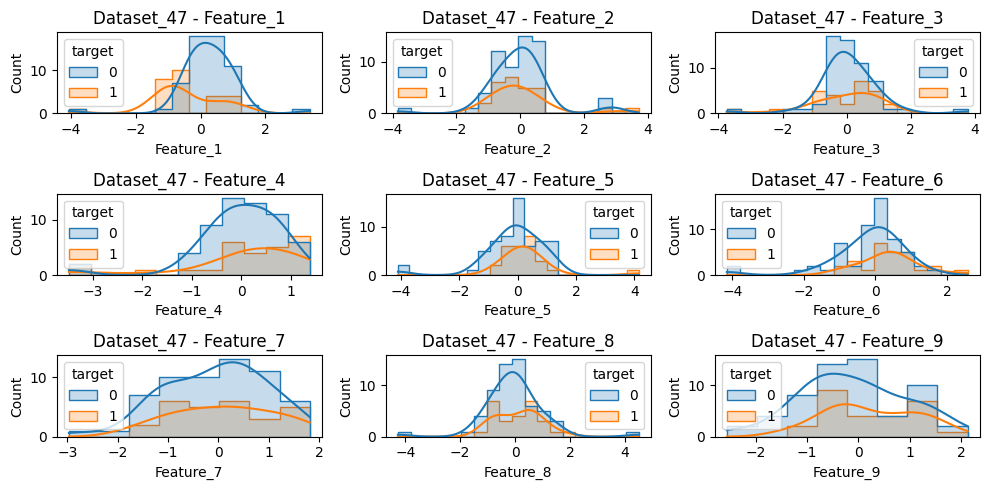

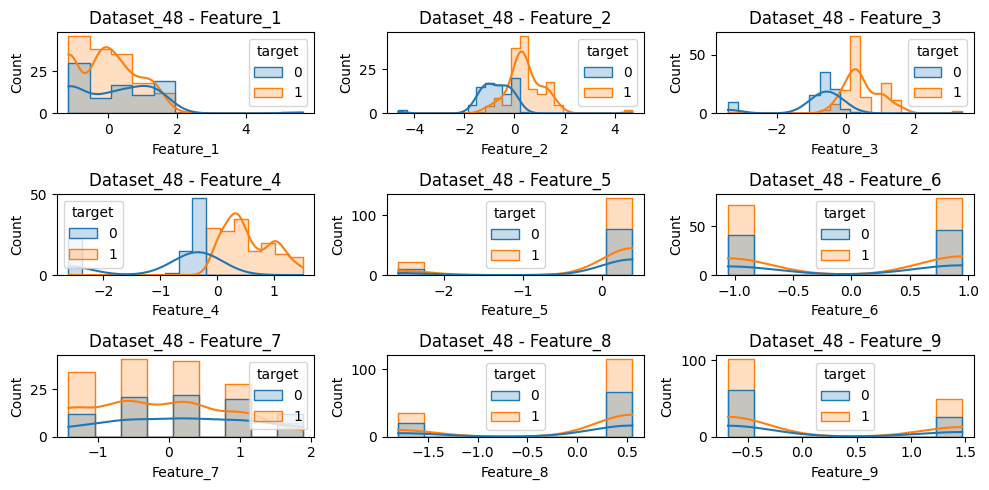

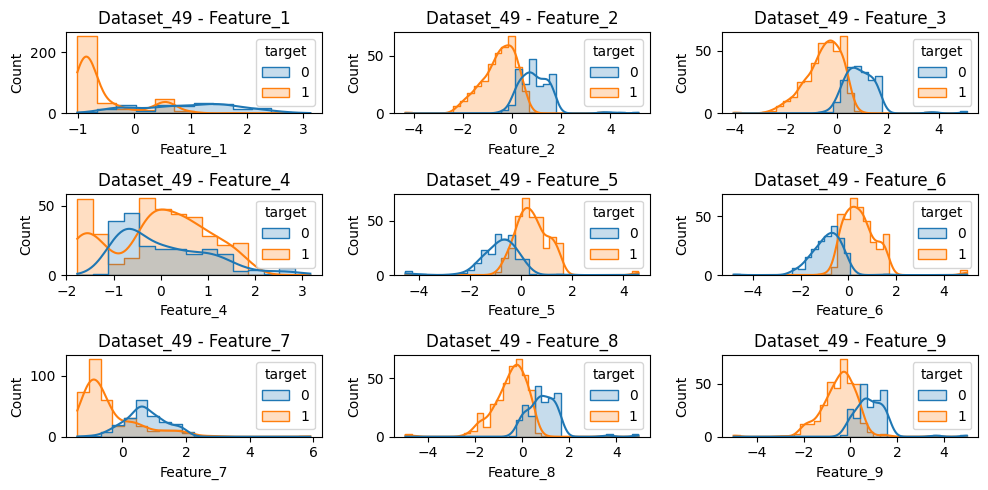

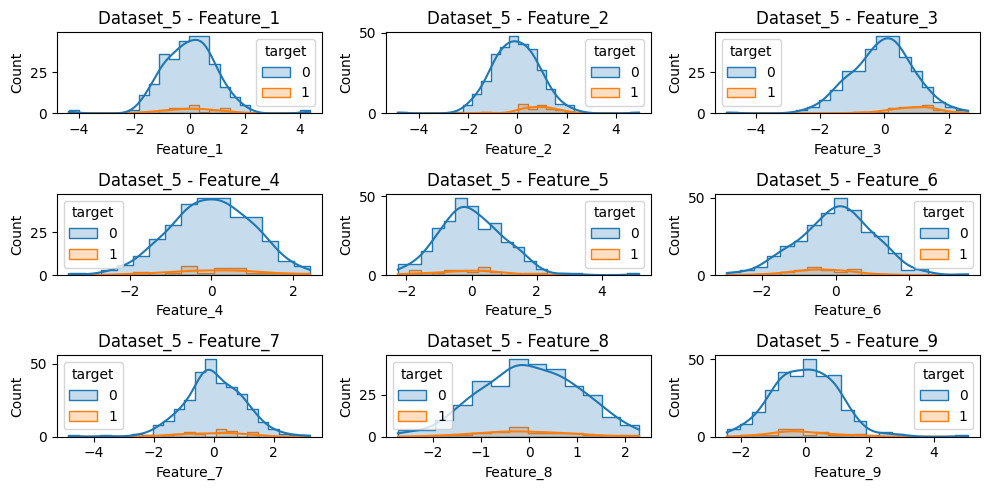

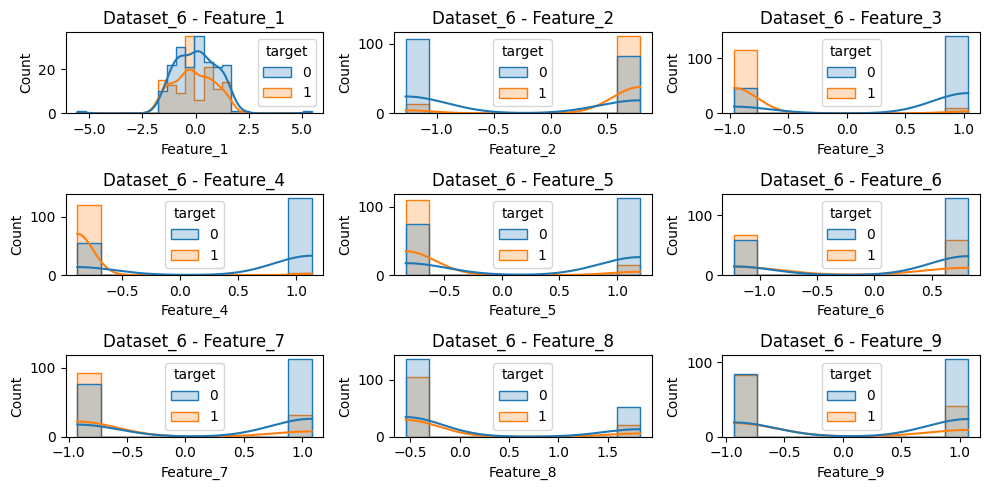

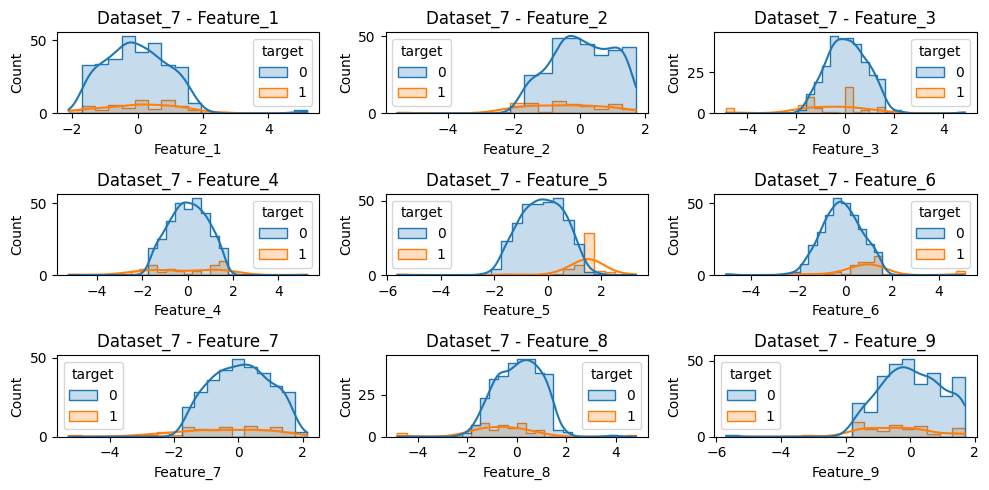

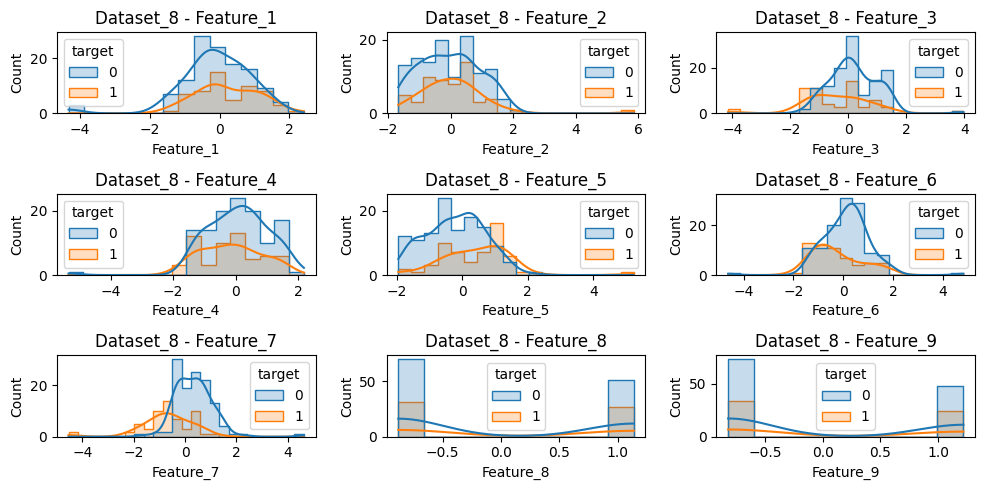

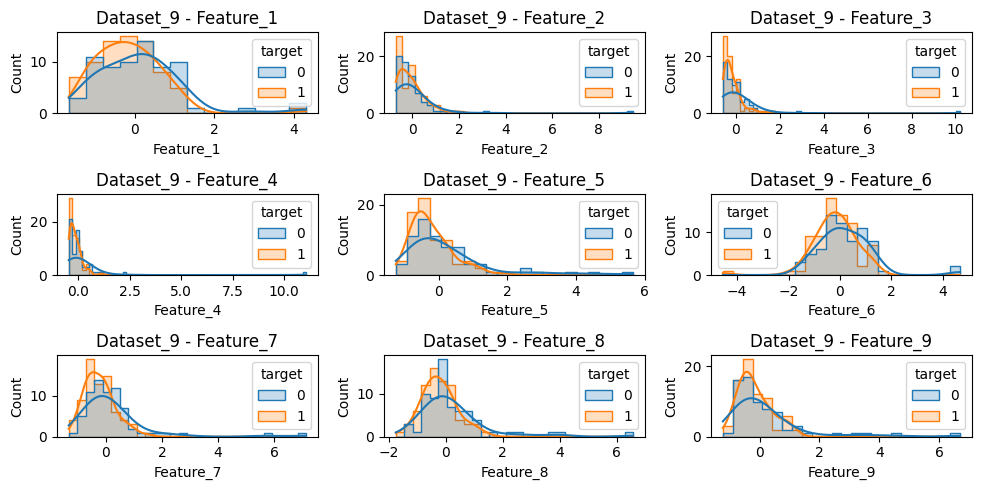

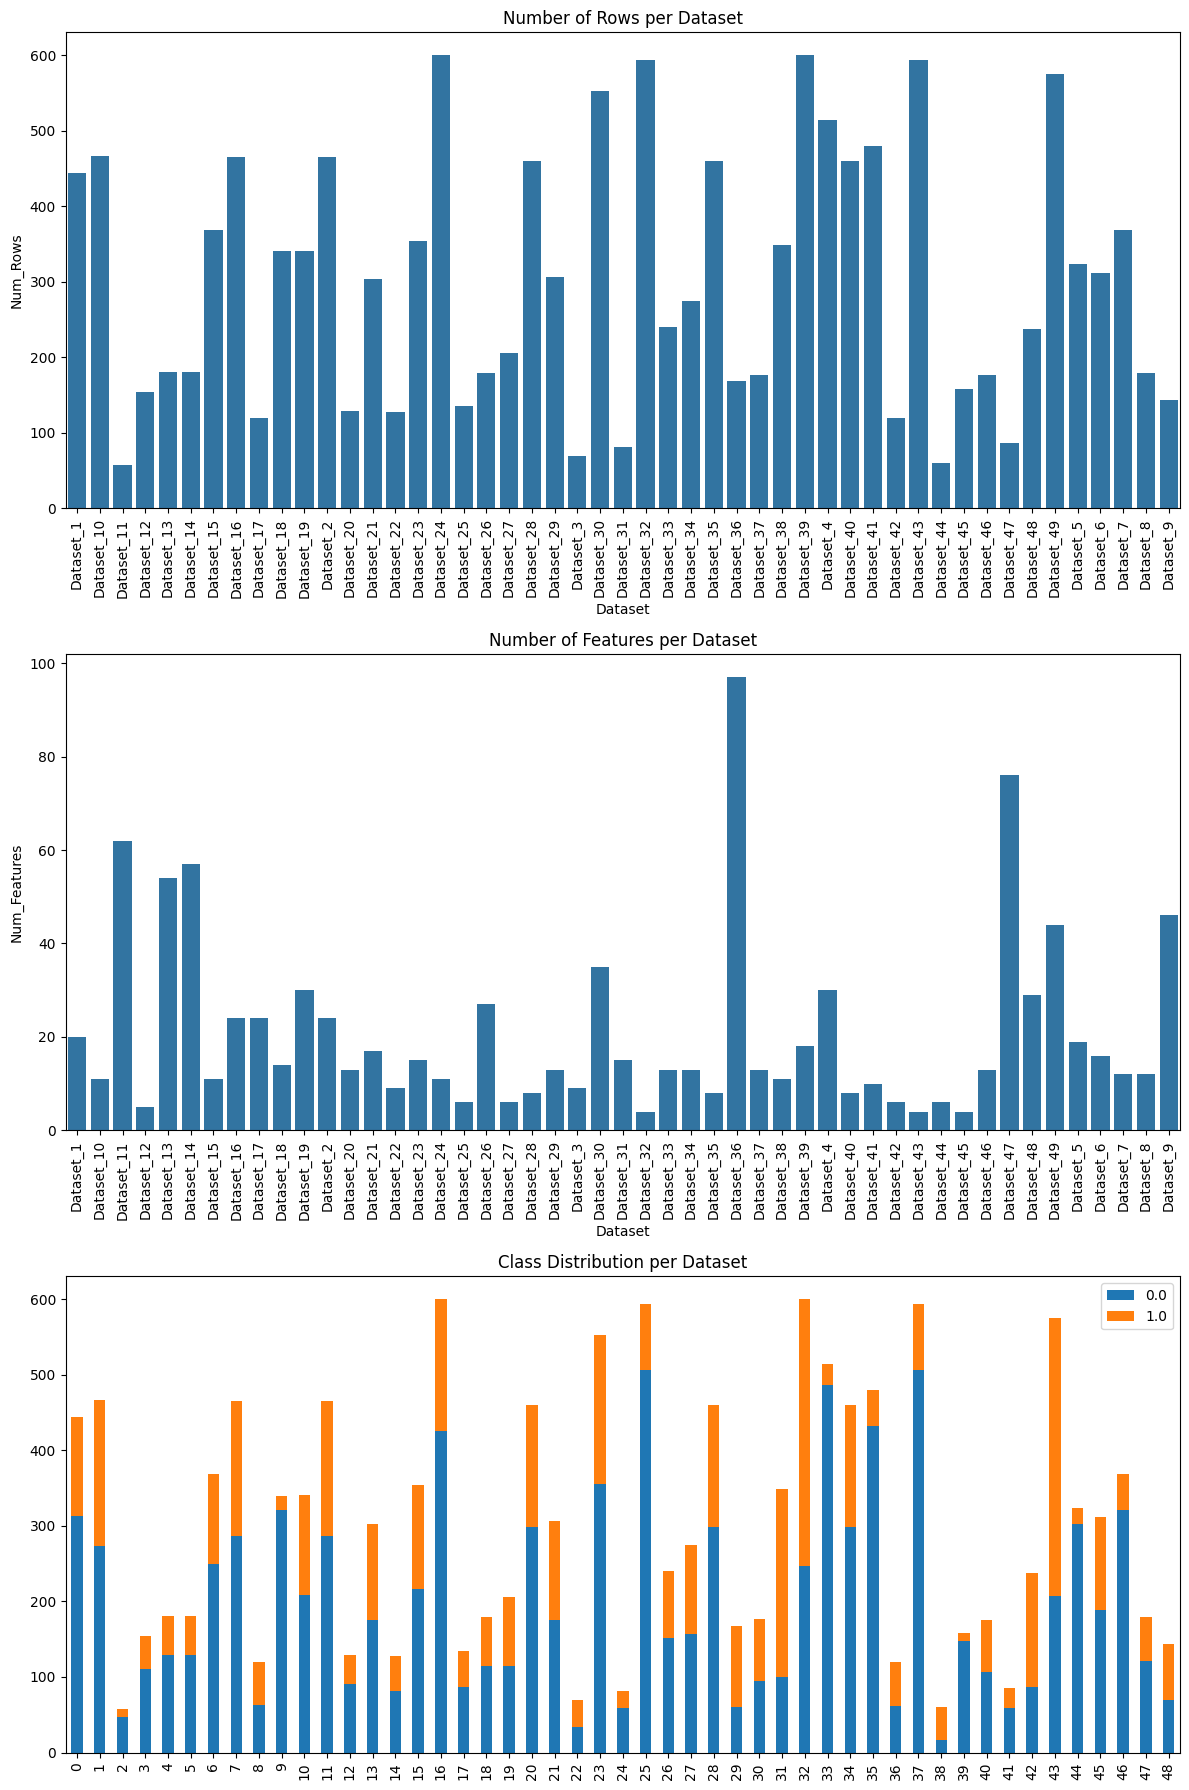

In [2]:

# Data Preprocessing: Scaling and visualization
def preprocess_and_visualize(X_train, y_train, title='Dataset'):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Convert scaled data back to DataFrame for visualization
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_df['target'] = y_train.values
    
    row_count = 2
    col_count = 3

    row_count = 3
    col_count = 3
    
    # Visualize distribution of features with respect to the target
    #plt.figure(figsize=(15, 10))
    plt.figure(figsize=(10, 5))
    # for i, feature in enumerate(X_train.columns[:6], 1):  # Limiting to the first 6 features for brevity
    #     plt.subplot(2, 3, i)
    for i, feature in enumerate(X_train.columns[:row_count*col_count], 1):  # Limiting to the first 6 features for brevity
        plt.subplot(row_count, col_count, i)
        sns.histplot(data=X_train_scaled_df, x=feature, hue='target', element="step", kde=True)
        # plt.title(f'{title} - Distribution of {feature}')
        plt.title(f'{title} - {feature}')
    plt.tight_layout()
    plt.show()
    
    return X_train_scaled_df


# Collect dataset summary information
dataset_info = []
folders = sorted(os.listdir(main_dir))

for folder in folders:
    dataset_path = os.path.join(main_dir, folder)
    x_train_path = os.path.join(dataset_path, 'X_train.csv')
    y_train_path = os.path.join(dataset_path, 'y_train.csv')
    if os.path.exists(x_train_path) and os.path.exists(y_train_path):
        X_train = pd.read_csv(x_train_path)
        y_train = pd.read_csv(y_train_path)
        dataset_info.append({
            'Dataset': folder,
            'Num_Features': X_train.shape[1],
            'Num_Rows': X_train.shape[0],
            'Class_Distribution': y_train['target'].value_counts().to_dict()
        })

        # Run preprocessing and visualize for Dataset_34
        X_train_scaled = preprocess_and_visualize(X_train, y_train['target'], title=folder)


# Convert to DataFrame for visualization
dataset_info_df = pd.DataFrame(dataset_info)

# Plot the dataset summary
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot number of rows in each dataset
sns.barplot(x='Dataset', y='Num_Rows', data=dataset_info_df, ax=axes[0])
axes[0].set_title('Number of Rows per Dataset')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot number of features in each dataset
sns.barplot(x='Dataset', y='Num_Features', data=dataset_info_df, ax=axes[1])
axes[1].set_title('Number of Features per Dataset')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Plot class distribution per dataset
class_dist_df = dataset_info_df['Class_Distribution'].apply(pd.Series).fillna(0)
class_dist_df.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title('Class Distribution per Dataset')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


Processing Dataset_1...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5306 - loss: 0.6916 - val_accuracy: 0.6270 - val_loss: 0.6746
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6176 - loss: 0.6668 - val_accuracy: 0.6587 - val_loss: 0.6546
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.6581 - val_accuracy: 0.6905 - val_loss: 0.6376
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7133 - loss: 0.6243 - val_accuracy: 0.6905 - val_loss: 0.6242
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6292 - val_accuracy: 0.7063 - val_loss: 0.6132
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.6219 - val_accuracy: 0.7143 - val_loss: 0.6028
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6864 - loss: 0.6005 - val_accuracy: 0.6984 - val_loss: 0.5935
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5898 - val_accuracy: 0.7063 - 

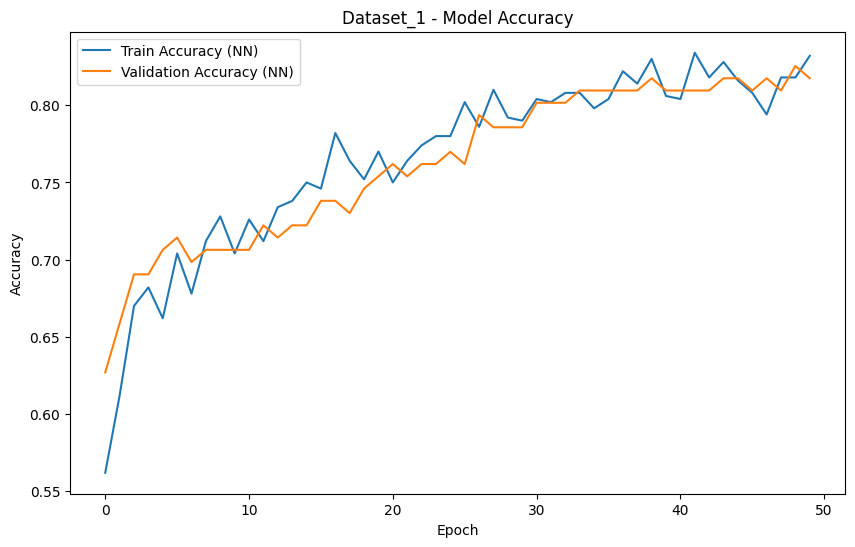

Processing Dataset_10...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5043 - loss: 0.6898 - val_accuracy: 0.7000 - val_loss: 0.6666
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5736 - loss: 0.6754 - val_accuracy: 0.7455 - val_loss: 0.6490
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 0.6692 - val_accuracy: 0.7818 - val_loss: 0.6292
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.6593 - val_accuracy: 0.7909 - val_loss: 0.6126
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6447 - loss: 0.6532 - val_accuracy: 0.7818 - val_loss: 0.5980
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6523 - loss: 0.6394 - val_accuracy: 0.7909 - val_loss: 0.5844
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 0.6370 - val_accuracy: 0.7909 - val_loss: 0.5727
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6094 - loss: 0.6553 - val_accuracy: 0.7909 -

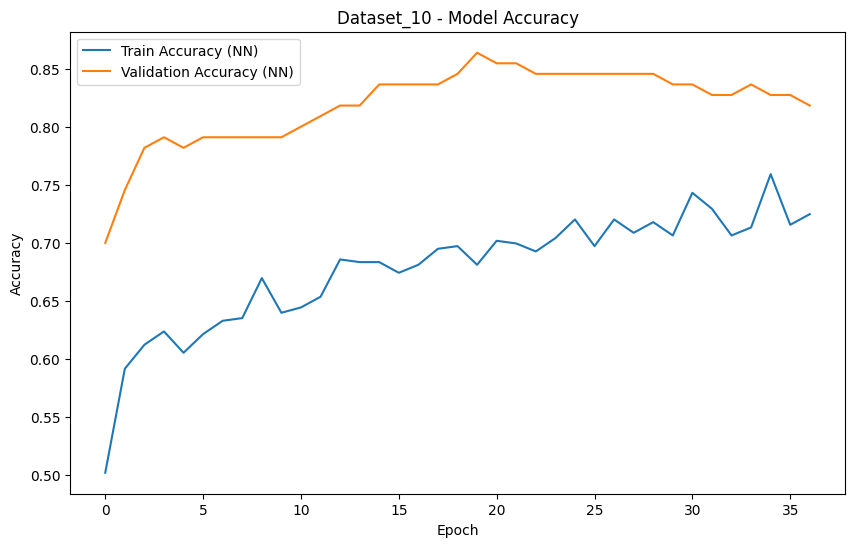

Processing Dataset_11...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.4940 - loss: 0.7324 - val_accuracy: 0.2632 - val_loss: 0.7843
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5660 - loss: 0.6632 - val_accuracy: 0.2105 - val_loss: 0.7743
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5060 - loss: 0.7036 - val_accuracy: 0.2632 - val_loss: 0.7584
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5624 - loss: 0.6810 - val_accuracy: 0.3158 - val_loss: 0.7448
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5838 - loss: 0.6305 - val_accuracy: 0.4737 - val_loss: 0.7334
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6595 - loss: 0.6253 - val_accuracy: 0.5263 - val_loss: 0.7219
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6402 - loss: 0.6512 - val_accuracy: 0.5263 - val_loss: 0.7105
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7003 - loss: 0.6115 - val_accuracy: 0

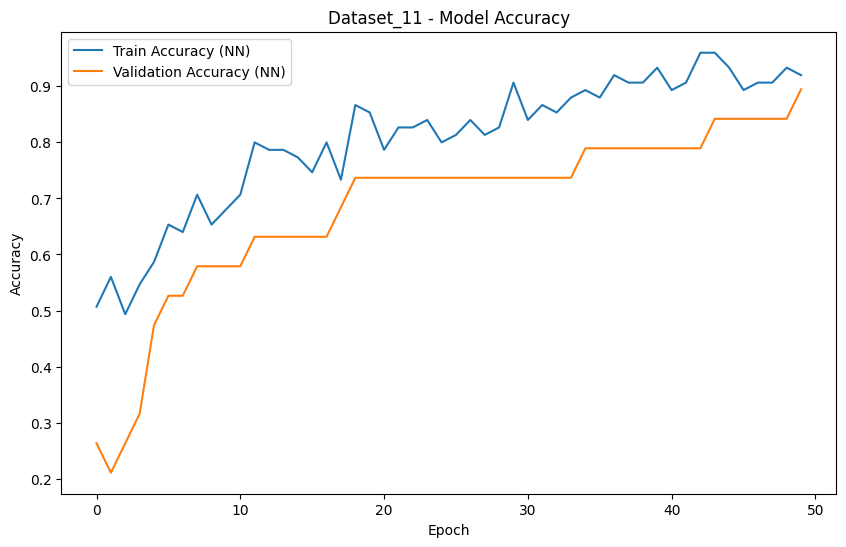

Processing Dataset_12...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5577 - loss: 0.6816 - val_accuracy: 0.7333 - val_loss: 0.6794
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5894 - loss: 0.6770 - val_accuracy: 0.6889 - val_loss: 0.6690
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7018 - loss: 0.6635 - val_accuracy: 0.7333 - val_loss: 0.6592
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6771 - loss: 0.6535 - val_accuracy: 0.7333 - val_loss: 0.6495
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7681 - loss: 0.6417 - val_accuracy: 0.7333 - val_loss: 0.6404
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7488 - loss: 0.6356 - val_accuracy: 0.7333 - val_loss: 0.6317
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7012 - loss: 0.6277 - val_accuracy: 0.7333 - val_loss: 0.6238
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7611 - loss: 0.6117 - val_accuracy: 0.7333 -

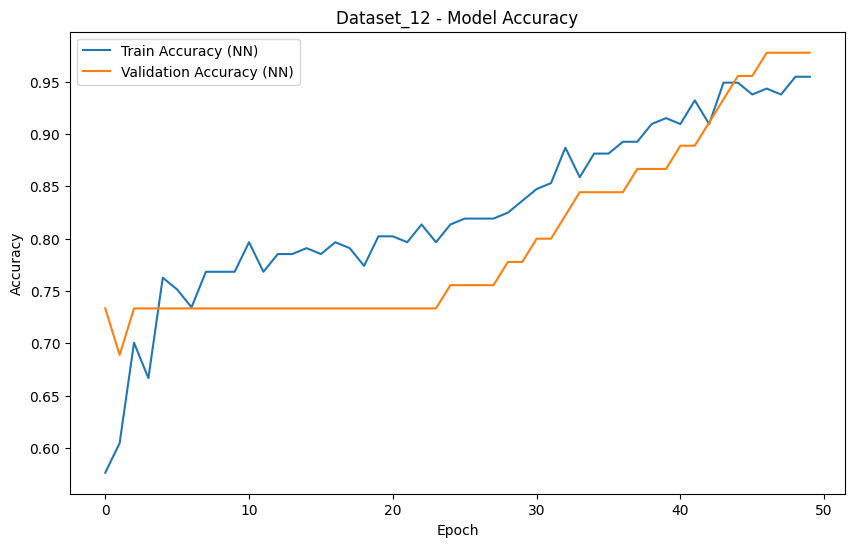

Processing Dataset_13...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5293 - loss: 0.7571 - val_accuracy: 0.4615 - val_loss: 0.7199
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5147 - loss: 0.7026 - val_accuracy: 0.5962 - val_loss: 0.6662
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5530 - loss: 0.6513 - val_accuracy: 0.6731 - val_loss: 0.6316
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6069 - loss: 0.6490 - val_accuracy: 0.7500 - val_loss: 0.6061
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6635 - loss: 0.6160 - val_accuracy: 0.8077 - val_loss: 0.5821
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6845 - loss: 0.5990 - val_accuracy: 0.8846 - val_loss: 0.5585
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7676 - loss: 0.5679 - val_accuracy: 0.9038 - val_loss: 0.5365
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7832 - loss: 0.5404 - val_accuracy: 0.9038 -

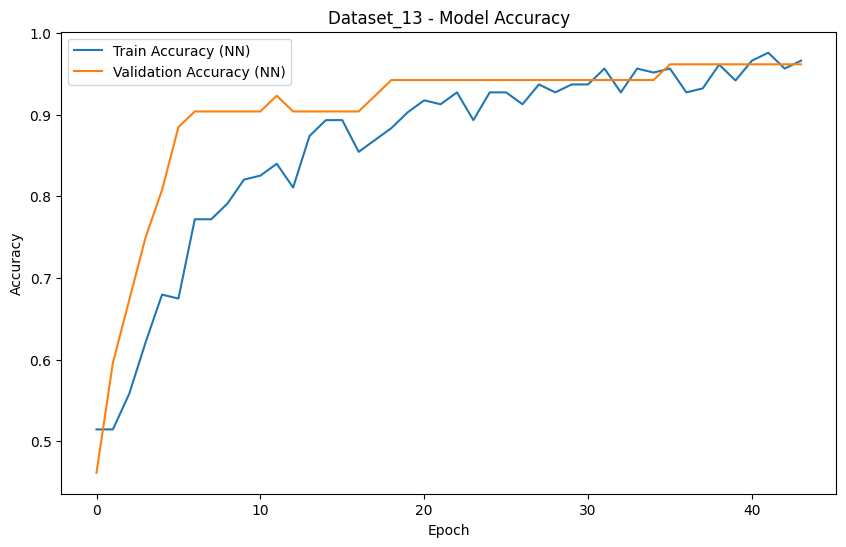

Processing Dataset_14...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3762 - loss: 0.7658 - val_accuracy: 0.4808 - val_loss: 0.6966
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4705 - loss: 0.7123 - val_accuracy: 0.5385 - val_loss: 0.6615
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5914 - loss: 0.6557 - val_accuracy: 0.5962 - val_loss: 0.6286
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6265 - loss: 0.6350 - val_accuracy: 0.6538 - val_loss: 0.5975
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6683 - loss: 0.6034 - val_accuracy: 0.6731 - val_loss: 0.5682
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7013 - loss: 0.5936 - val_accuracy: 0.7115 - val_loss: 0.5389
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7793 - loss: 0.5312 - val_accuracy: 0.7885 - val_loss: 0.5084
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - loss: 0.5096 - val_accuracy: 0.8077 

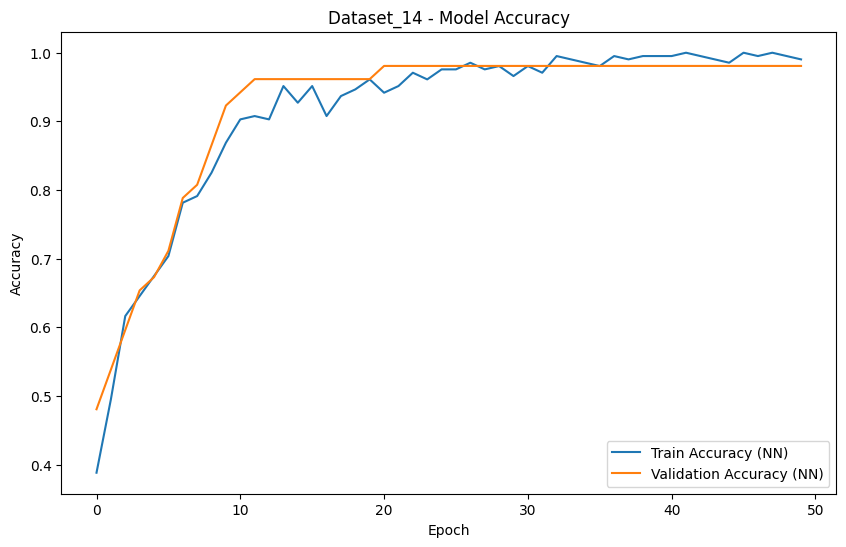

Processing Dataset_15...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4987 - loss: 0.6939 - val_accuracy: 0.4900 - val_loss: 0.6866
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5485 - loss: 0.6717 - val_accuracy: 0.5000 - val_loss: 0.6741
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 0.6678 - val_accuracy: 0.5900 - val_loss: 0.6618
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.6468 - val_accuracy: 0.6800 - val_loss: 0.6506
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.6387 - val_accuracy: 0.6800 - val_loss: 0.6402
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6848 - loss: 0.6268 - val_accuracy: 0.6700 - val_loss: 0.6312
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 0.6114 - val_accuracy: 0.6800 - val_loss: 0.6241
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7235 - loss: 0.5974 - val_accuracy: 0.6900 -

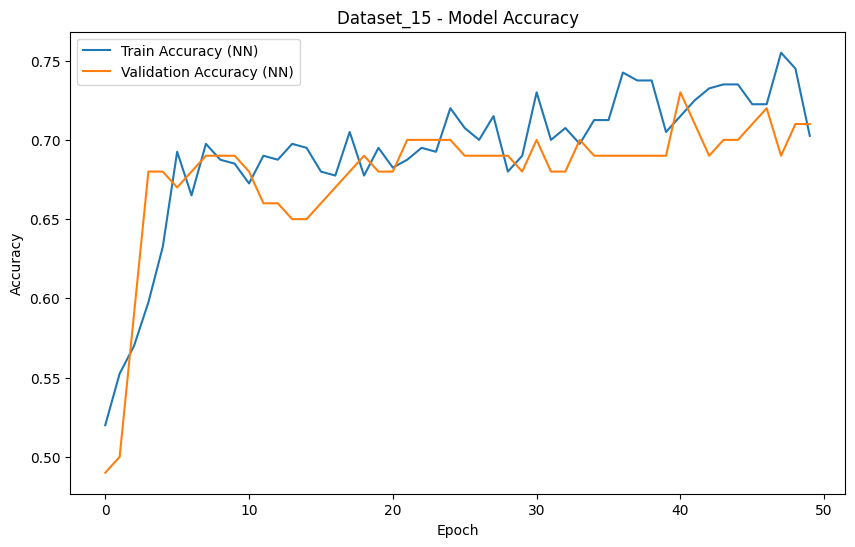

Processing Dataset_16...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6807 - loss: 0.6409 - val_accuracy: 0.9565 - val_loss: 0.5424
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 0.5319 - val_accuracy: 0.9652 - val_loss: 0.4521
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.4450 - val_accuracy: 0.9652 - val_loss: 0.3752
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9195 - loss: 0.3755 - val_accuracy: 0.9652 - val_loss: 0.3083
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9300 - loss: 0.3191 - val_accuracy: 0.9652 - val_loss: 0.2495
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9474 - loss: 0.2511 - val_accuracy: 0.9739 - val_loss: 0.2025
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.2100 - val_accuracy: 0.9826 - val_loss: 0.1670
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1858 - val_accuracy: 0.9826 -

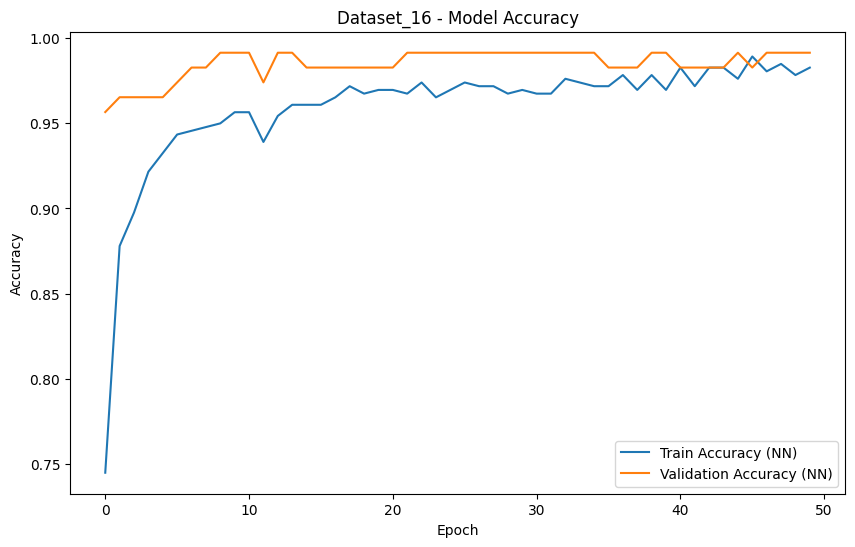

Processing Dataset_17...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5779 - loss: 0.6642 - val_accuracy: 0.6923 - val_loss: 0.6267
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5556 - loss: 0.6502 - val_accuracy: 0.7692 - val_loss: 0.6003
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7923 - loss: 0.6054 - val_accuracy: 0.8077 - val_loss: 0.5757
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7329 - loss: 0.5918 - val_accuracy: 0.8462 - val_loss: 0.5540
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8123 - loss: 0.5710 - val_accuracy: 0.8462 - val_loss: 0.5341
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8204 - loss: 0.5454 - val_accuracy: 0.8462 - val_loss: 0.5157
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8375 - loss: 0.5131 - val_accuracy: 0.8462 - val_loss: 0.4988
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8612 - loss: 0.4997 - val_accuracy: 0

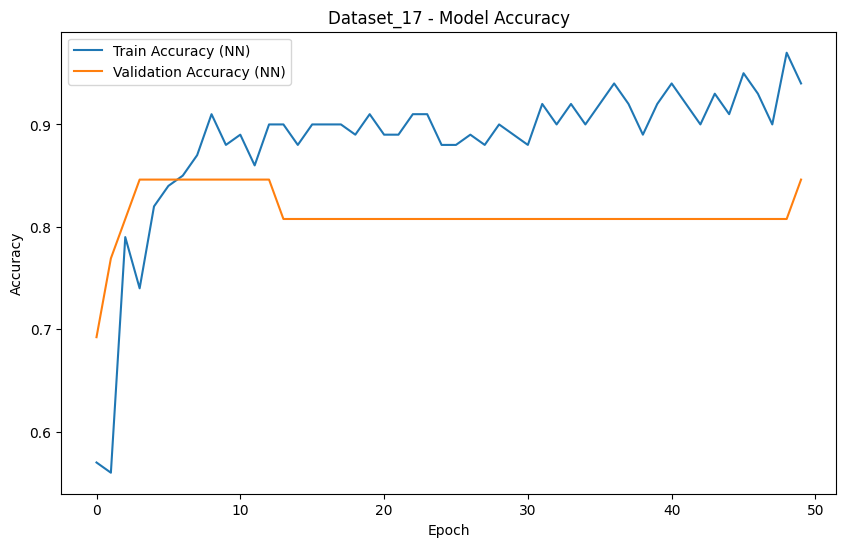

Processing Dataset_18...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5149 - loss: 0.6831 - val_accuracy: 0.7287 - val_loss: 0.6182
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7096 - loss: 0.6237 - val_accuracy: 0.9302 - val_loss: 0.5618
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8190 - loss: 0.5689 - val_accuracy: 0.9845 - val_loss: 0.4999
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8925 - loss: 0.4977 - val_accuracy: 0.9922 - val_loss: 0.4328
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.4459 - val_accuracy: 0.9922 - val_loss: 0.3713
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.3993 - val_accuracy: 0.9922 - val_loss: 0.3088
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.3419 - val_accuracy: 1.0000 - val_loss: 0.2470
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.2670 - val_accuracy: 1.0000 - 

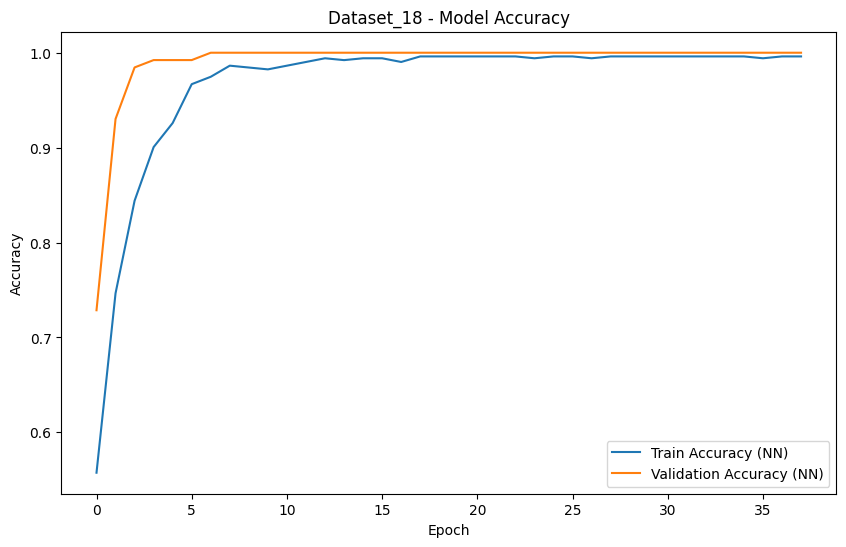

Processing Dataset_19...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5332 - loss: 0.6822 - val_accuracy: 0.7976 - val_loss: 0.5990
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.5820 - val_accuracy: 0.8571 - val_loss: 0.5193
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.5276 - val_accuracy: 0.8810 - val_loss: 0.4555
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.4376 - val_accuracy: 0.9048 - val_loss: 0.3992
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9011 - loss: 0.3805 - val_accuracy: 0.9167 - val_loss: 0.3498
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - loss: 0.3557 - val_accuracy: 0.9167 - val_loss: 0.3055
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9393 - loss: 0.3033 - val_accuracy: 0.9286 - val_loss: 0.2653
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9471 - loss: 0.2733 - val_accuracy: 0.9405 -

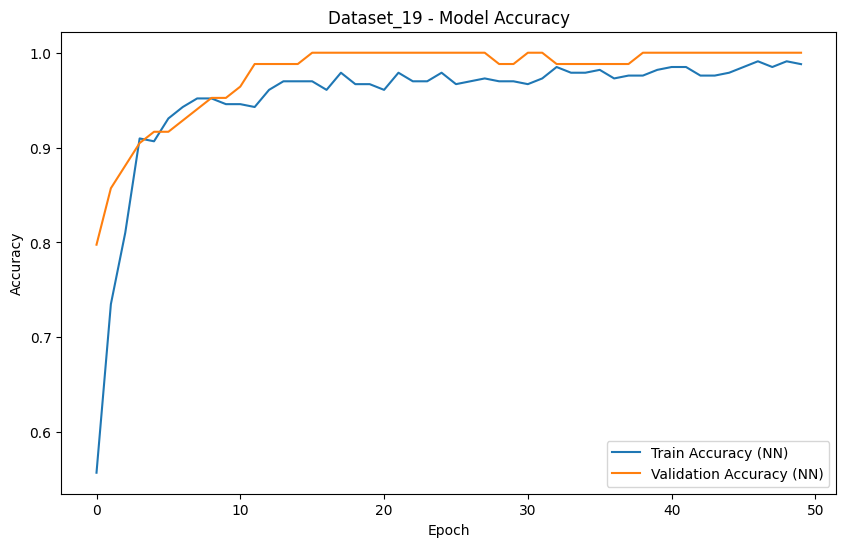

Processing Dataset_2...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5192 - loss: 0.7092 - val_accuracy: 0.9043 - val_loss: 0.5982
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.6117 - val_accuracy: 0.9478 - val_loss: 0.5175
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8768 - loss: 0.5328 - val_accuracy: 0.9739 - val_loss: 0.4351
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9073 - loss: 0.4598 - val_accuracy: 0.9739 - val_loss: 0.3571
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.3867 - val_accuracy: 0.9739 - val_loss: 0.2869
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - loss: 0.3081 - val_accuracy: 0.9826 - val_loss: 0.2279
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9297 - loss: 0.2681 - val_accuracy: 0.9739 - val_loss: 0.1824
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9223 - loss: 0.2286 - val_accuracy: 0.9739 - 

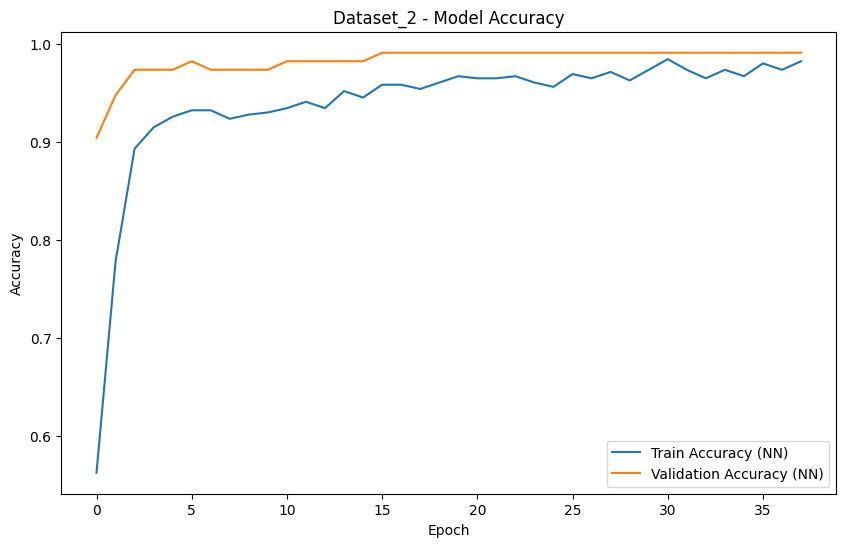

Processing Dataset_20...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4699 - loss: 0.7102 - val_accuracy: 0.5405 - val_loss: 0.6736
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5547 - loss: 0.6877 - val_accuracy: 0.7027 - val_loss: 0.6564
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5910 - loss: 0.6683 - val_accuracy: 0.8108 - val_loss: 0.6402
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6646 - loss: 0.6404 - val_accuracy: 0.8649 - val_loss: 0.6242
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7234 - loss: 0.6213 - val_accuracy: 0.8649 - val_loss: 0.6079
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7930 - loss: 0.5824 - val_accuracy: 0.8378 - val_loss: 0.5915
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7072 - loss: 0.5967 - val_accuracy: 0.8649 - val_loss: 0.5753
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.5608 - val_accuracy: 0.8649 -

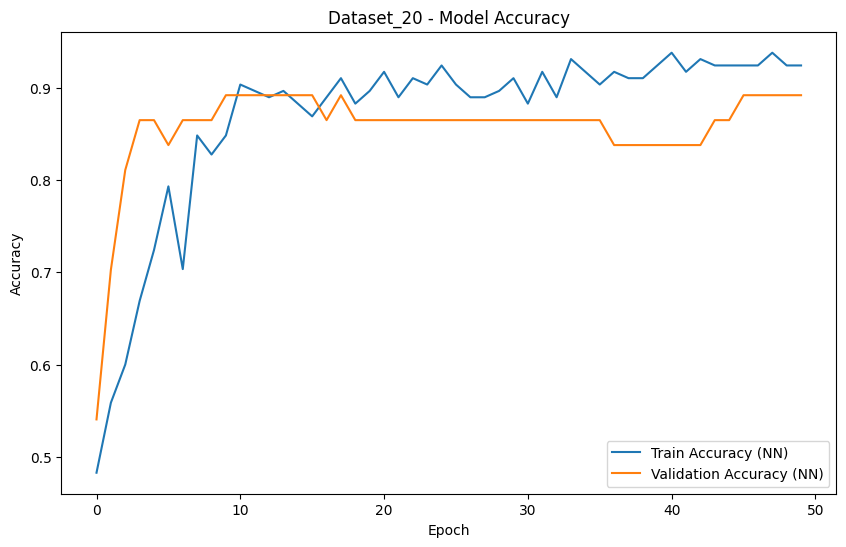

Processing Dataset_21...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5078 - loss: 0.6898 - val_accuracy: 0.6714 - val_loss: 0.6683
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5762 - loss: 0.6592 - val_accuracy: 0.7000 - val_loss: 0.6375
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7237 - loss: 0.6021 - val_accuracy: 0.7143 - val_loss: 0.6107
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - loss: 0.5649 - val_accuracy: 0.7000 - val_loss: 0.5870
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.5474 - val_accuracy: 0.7286 - val_loss: 0.5647
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.5258 - val_accuracy: 0.7286 - val_loss: 0.5444
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.4745 - val_accuracy: 0.7286 - val_loss: 0.5252
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8038 - loss: 0.4777 - val_accuracy: 0.7286 -

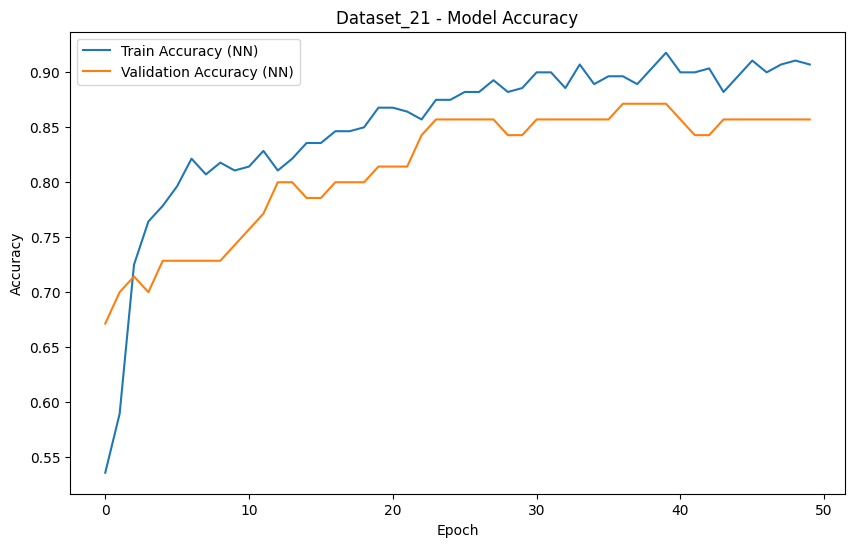

Processing Dataset_22...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4844 - loss: 0.7124 - val_accuracy: 0.5152 - val_loss: 0.6930
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4805 - loss: 0.7000 - val_accuracy: 0.5152 - val_loss: 0.6825
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5720 - loss: 0.6708 - val_accuracy: 0.5152 - val_loss: 0.6752
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5097 - loss: 0.6991 - val_accuracy: 0.5152 - val_loss: 0.6691
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5408 - loss: 0.6770 - val_accuracy: 0.5152 - val_loss: 0.6630
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5584 - loss: 0.6673 - val_accuracy: 0.5455 - val_loss: 0.6569
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5388 - loss: 0.6705 - val_accuracy: 0.5455 - val_loss: 0.6517
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6012 - loss: 0.6667 - val_accuracy: 0.5455 -

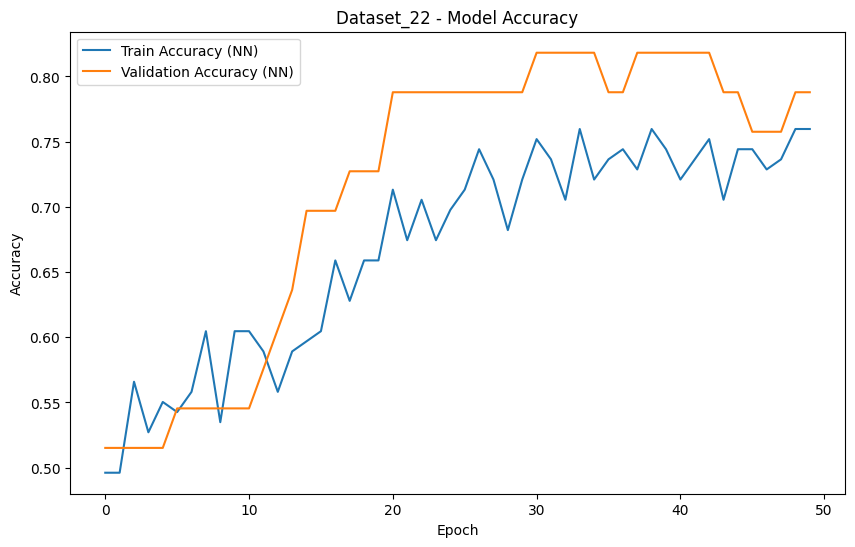

Processing Dataset_23...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5570 - loss: 0.6821 - val_accuracy: 0.7356 - val_loss: 0.6138
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.6316 - val_accuracy: 0.8851 - val_loss: 0.5629
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8027 - loss: 0.5843 - val_accuracy: 0.9080 - val_loss: 0.5196
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.5461 - val_accuracy: 0.9310 - val_loss: 0.4794
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.5078 - val_accuracy: 0.9310 - val_loss: 0.4407
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.4579 - val_accuracy: 0.9310 - val_loss: 0.4056
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.4153 - val_accuracy: 0.9310 - val_loss: 0.3774
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8450 - loss: 0.4056 - val_accuracy: 0.9310 -

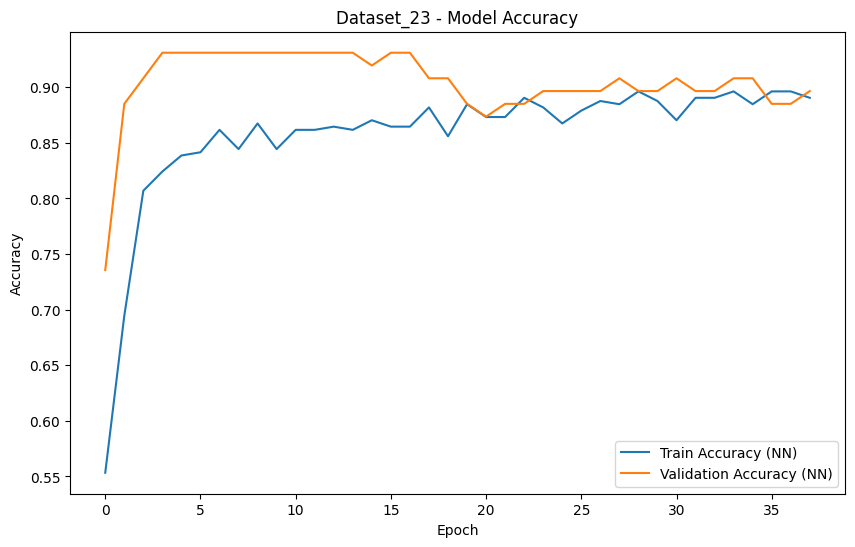

Processing Dataset_24...
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4749 - loss: 0.6955 - val_accuracy: 0.6433 - val_loss: 0.6651
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 0.6805 - val_accuracy: 0.6550 - val_loss: 0.6479
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.6521 - val_accuracy: 0.6608 - val_loss: 0.6373
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.6351 - val_accuracy: 0.6667 - val_loss: 0.6286
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.6309 - val_accuracy: 0.6784 - val_loss: 0.6212
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - loss: 0.6254 - val_accuracy: 0.6667 - val_loss: 0.6166
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.6032 - val_accuracy: 0.6667 - val_loss: 0.6137
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6393 - loss: 0.6278 - val_acc

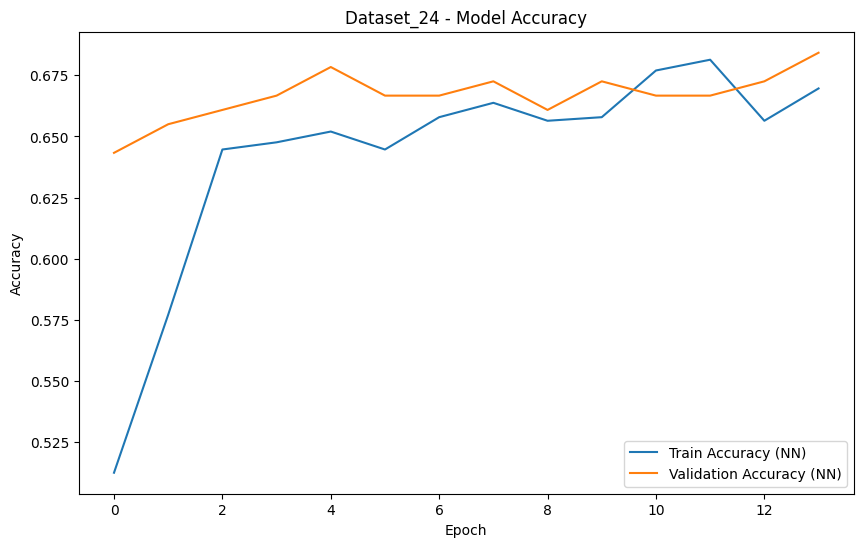

Processing Dataset_25...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5132 - loss: 0.6875 - val_accuracy: 0.6000 - val_loss: 0.6782
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5432 - loss: 0.6818 - val_accuracy: 0.7143 - val_loss: 0.6756
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5925 - loss: 0.6731 - val_accuracy: 0.6857 - val_loss: 0.6733
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5905 - loss: 0.6757 - val_accuracy: 0.7429 - val_loss: 0.6711
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6326 - loss: 0.6652 - val_accuracy: 0.8000 - val_loss: 0.6691
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6675 - loss: 0.6581 - val_accuracy: 0.8000 - val_loss: 0.6666
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.6591 - val_accuracy: 0.8000 - val_loss: 0.6627
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 0.6531 - val_accuracy: 0.8000 -

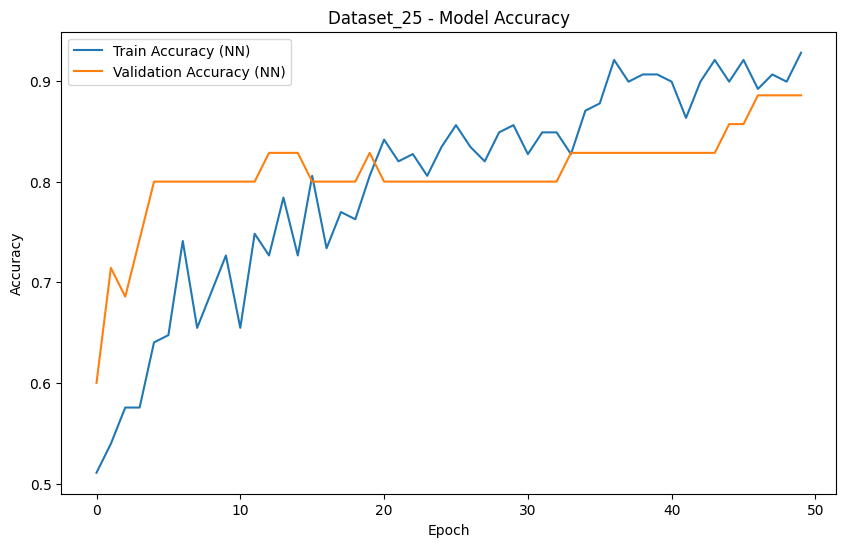

Processing Dataset_26...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5435 - loss: 0.6953 - val_accuracy: 0.6087 - val_loss: 0.6626
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6288 - loss: 0.6551 - val_accuracy: 0.6957 - val_loss: 0.6469
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6175 - loss: 0.6690 - val_accuracy: 0.6957 - val_loss: 0.6316
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6438 - loss: 0.6421 - val_accuracy: 0.7174 - val_loss: 0.6174
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8015 - loss: 0.5949 - val_accuracy: 0.8043 - val_loss: 0.6026
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7663 - loss: 0.5906 - val_accuracy: 0.8043 - val_loss: 0.5876
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7717 - loss: 0.5833 - val_accuracy: 0.8043 - val_loss: 0.5729
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7420 - loss: 0.5821 - val_accuracy: 0.8043 -

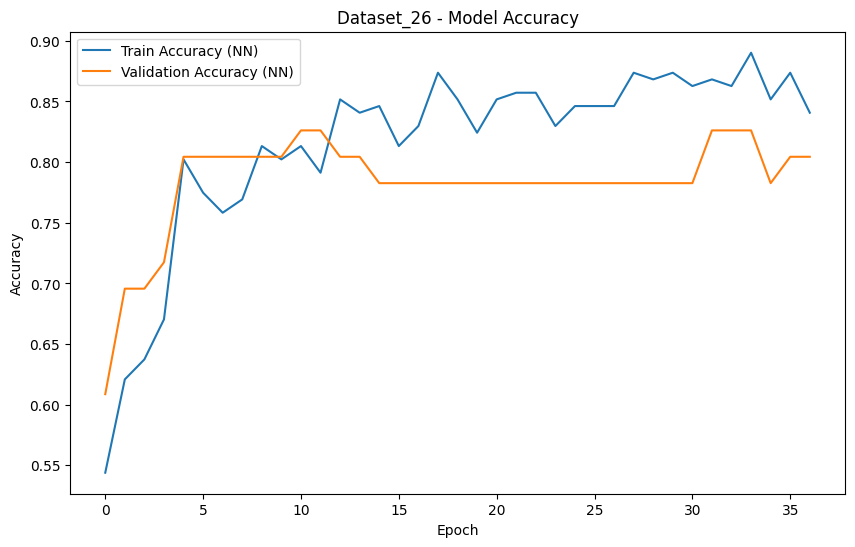

Processing Dataset_27...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4637 - loss: 0.6990 - val_accuracy: 0.6304 - val_loss: 0.6941
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5999 - loss: 0.6825 - val_accuracy: 0.8043 - val_loss: 0.6744
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7534 - loss: 0.6645 - val_accuracy: 0.8913 - val_loss: 0.6549
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8606 - loss: 0.6495 - val_accuracy: 1.0000 - val_loss: 0.6356
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8978 - loss: 0.6269 - val_accuracy: 1.0000 - val_loss: 0.6152
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9397 - loss: 0.6126 - val_accuracy: 1.0000 - val_loss: 0.5935
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9616 - loss: 0.5965 - val_accuracy: 1.0000 - val_loss: 0.5708
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9487 - loss: 0.5769 - val_accuracy: 1.0000 -

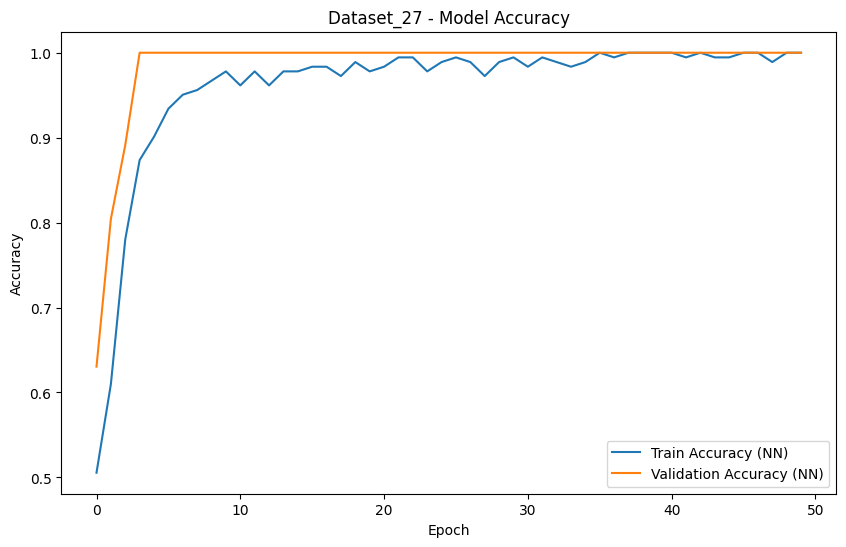

Processing Dataset_28...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4807 - loss: 0.7207 - val_accuracy: 0.4833 - val_loss: 0.6647
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.6606 - val_accuracy: 0.6333 - val_loss: 0.6324
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - loss: 0.6330 - val_accuracy: 0.7083 - val_loss: 0.6042
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.6042 - val_accuracy: 0.7333 - val_loss: 0.5773
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7570 - loss: 0.5771 - val_accuracy: 0.7417 - val_loss: 0.5507
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7806 - loss: 0.5374 - val_accuracy: 0.7583 - val_loss: 0.5271
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.5145 - val_accuracy: 0.7333 - val_loss: 0.5077
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.4895 - val_accuracy: 0.7250 -

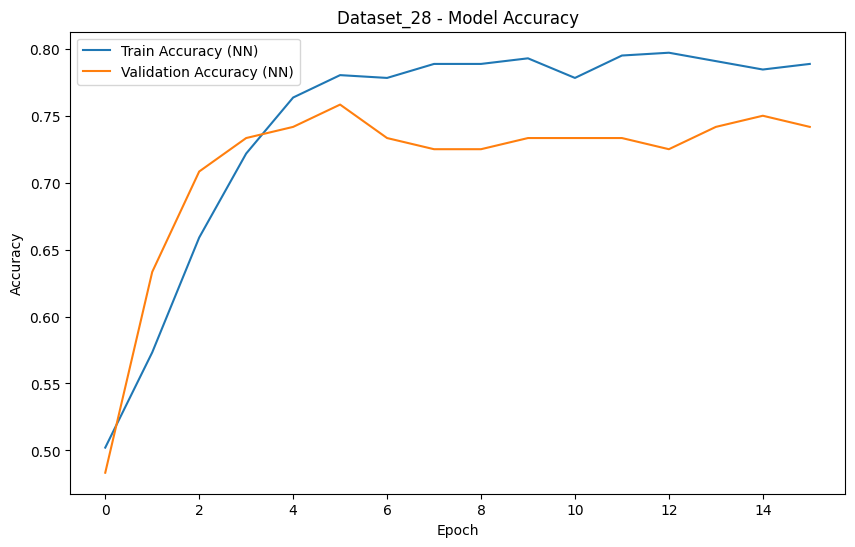

Processing Dataset_29...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6063 - loss: 0.6666 - val_accuracy: 0.7571 - val_loss: 0.6255
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.6355 - val_accuracy: 0.7714 - val_loss: 0.5907
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.6082 - val_accuracy: 0.8143 - val_loss: 0.5594
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7749 - loss: 0.5790 - val_accuracy: 0.8000 - val_loss: 0.5318
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7757 - loss: 0.5636 - val_accuracy: 0.8000 - val_loss: 0.5070
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7906 - loss: 0.5326 - val_accuracy: 0.7857 - val_loss: 0.4841
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8206 - loss: 0.4862 - val_accuracy: 0.8143 - val_loss: 0.4633
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.4956 - val_accuracy: 0.8143 -

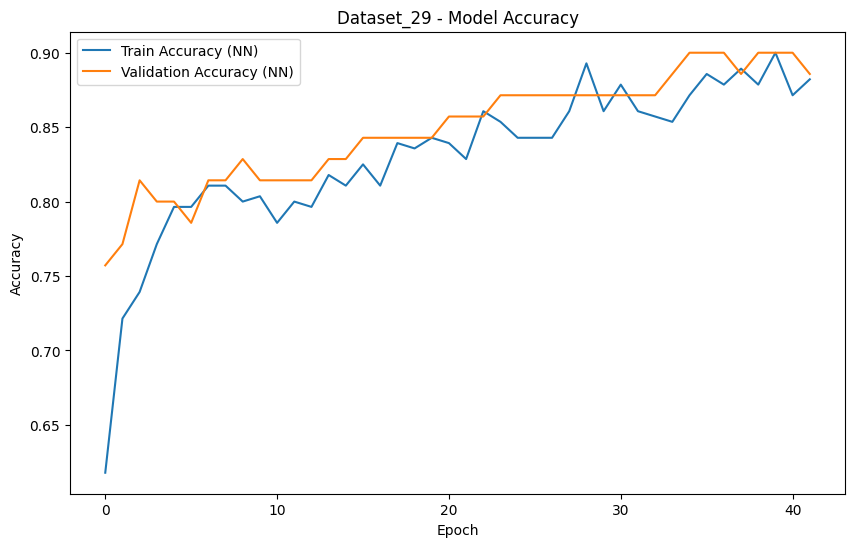

Processing Dataset_3...
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.6429 - loss: 0.6678 - val_accuracy: 0.3571 - val_loss: 0.6945
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5714 - loss: 0.6726 - val_accuracy: 0.2857 - val_loss: 0.6930
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5714 - loss: 0.6777 - val_accuracy: 0.2857 - val_loss: 0.6911
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5893 - loss: 0.6729 - val_accuracy: 0.2857 - val_loss: 0.6890
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6071 - loss: 0.6702 - val_accuracy: 0.3571 - val_loss: 0.6874
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6964 - loss: 0.6478 - val_accuracy: 0.3571 - val_loss: 0.6861
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6071 - loss: 0.6608 - val_accuracy: 0.3571 - val_loss: 0.6849
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7321 - loss: 0.6374 - val_accuracy: 0

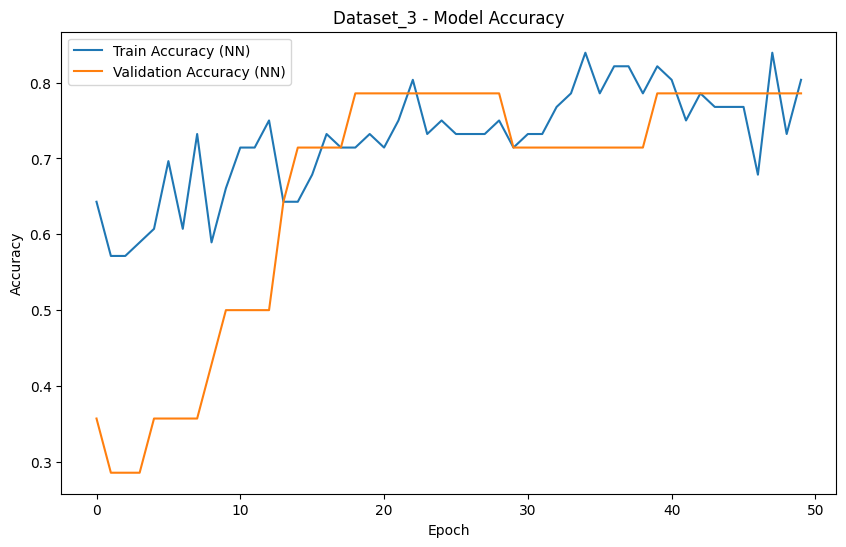

Processing Dataset_30...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4987 - loss: 0.7035 - val_accuracy: 0.6620 - val_loss: 0.6549
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 0.6717 - val_accuracy: 0.6901 - val_loss: 0.6272
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6606 - loss: 0.6440 - val_accuracy: 0.6901 - val_loss: 0.6040
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.6059 - val_accuracy: 0.6831 - val_loss: 0.5847
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - loss: 0.5892 - val_accuracy: 0.6972 - val_loss: 0.5706
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.5946 - val_accuracy: 0.6761 - val_loss: 0.5591
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6916 - loss: 0.5545 - val_accuracy: 0.6831 - val_loss: 0.5493
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7029 - loss: 0.5439 - val_accuracy: 0.6972 - 

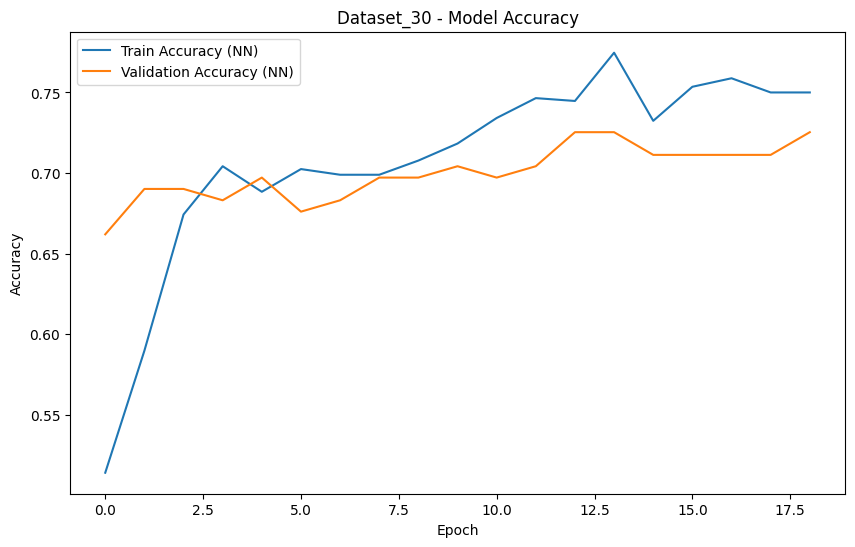

Processing Dataset_31...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4541 - loss: 0.7723 - val_accuracy: 0.5833 - val_loss: 0.7011
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4314 - loss: 0.7471 - val_accuracy: 0.5833 - val_loss: 0.6850
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4598 - loss: 0.7066 - val_accuracy: 0.5833 - val_loss: 0.6695
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.6782 - val_accuracy: 0.6667 - val_loss: 0.6549
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5317 - loss: 0.6959 - val_accuracy: 0.6667 - val_loss: 0.6416
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6410 - loss: 0.6549 - val_accuracy: 0.7500 - val_loss: 0.6287
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5776 - loss: 0.6684 - val_accuracy: 0.8333 - val_loss: 0.6166
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7166 - loss: 0.6211 - val_accuracy: 0

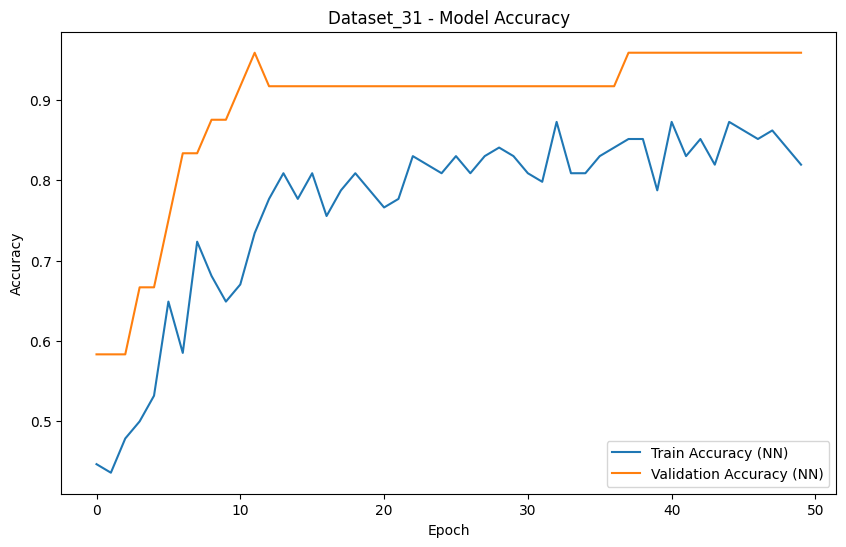

Processing Dataset_32...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6265 - loss: 0.6759 - val_accuracy: 0.7833 - val_loss: 0.6360
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.6434 - val_accuracy: 0.7833 - val_loss: 0.5895
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7475 - loss: 0.6020 - val_accuracy: 0.7931 - val_loss: 0.5513
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.5642 - val_accuracy: 0.7931 - val_loss: 0.5233
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7590 - loss: 0.5332 - val_accuracy: 0.7833 - val_loss: 0.5070
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7564 - loss: 0.5376 - val_accuracy: 0.7783 - val_loss: 0.5022
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7567 - loss: 0.5136 - val_accuracy: 0.7635 - val_loss: 0.5030
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7597 - loss: 0.5281 - val_acc

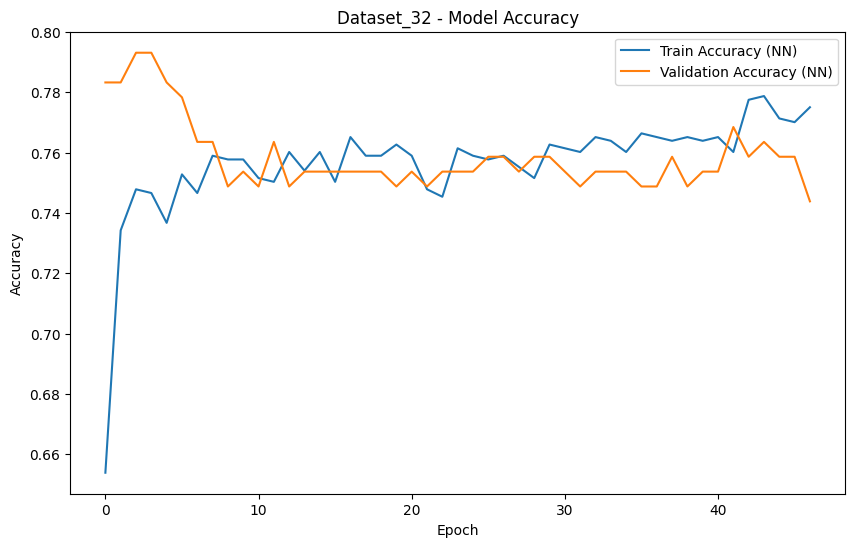

Processing Dataset_33...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6189 - loss: 0.6789 - val_accuracy: 0.9344 - val_loss: 0.6224
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.6389 - val_accuracy: 0.9836 - val_loss: 0.5746
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9129 - loss: 0.5909 - val_accuracy: 0.9836 - val_loss: 0.5282
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9152 - loss: 0.5461 - val_accuracy: 0.9836 - val_loss: 0.4829
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9622 - loss: 0.4997 - val_accuracy: 0.9836 - val_loss: 0.4388
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.4516 - val_accuracy: 0.9836 - val_loss: 0.3954
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9709 - loss: 0.4137 - val_accuracy: 0.9836 - val_loss: 0.3532
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9628 - loss: 0.3769 - val_accuracy: 0.9836 -

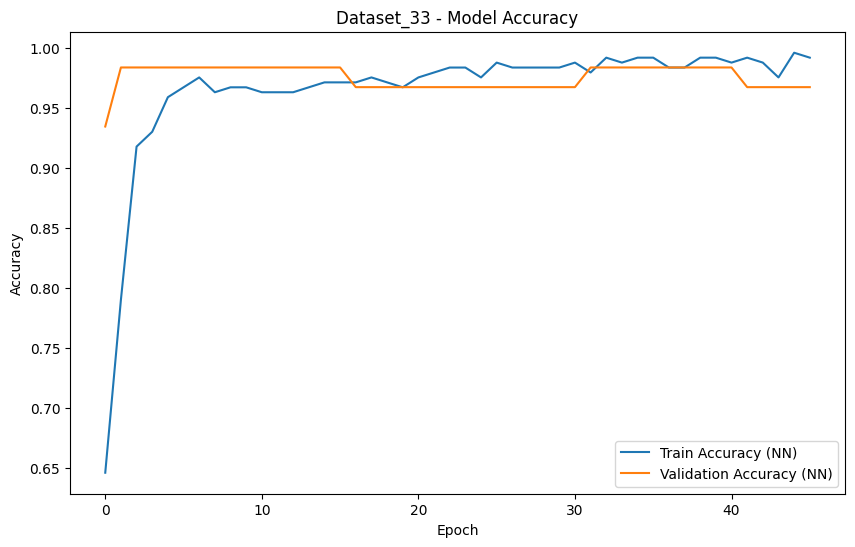

Processing Dataset_34...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5482 - loss: 0.6854 - val_accuracy: 0.7778 - val_loss: 0.6580
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 0.6629 - val_accuracy: 0.7778 - val_loss: 0.6310
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7506 - loss: 0.6320 - val_accuracy: 0.7937 - val_loss: 0.6058
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7146 - loss: 0.6299 - val_accuracy: 0.8095 - val_loss: 0.5819
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7563 - loss: 0.5953 - val_accuracy: 0.8095 - val_loss: 0.5579
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7392 - loss: 0.5847 - val_accuracy: 0.8095 - val_loss: 0.5354
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7779 - loss: 0.5559 - val_accuracy: 0.8095 - val_loss: 0.5139
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7445 - loss: 0.5430 - val_accuracy: 0.8095 -

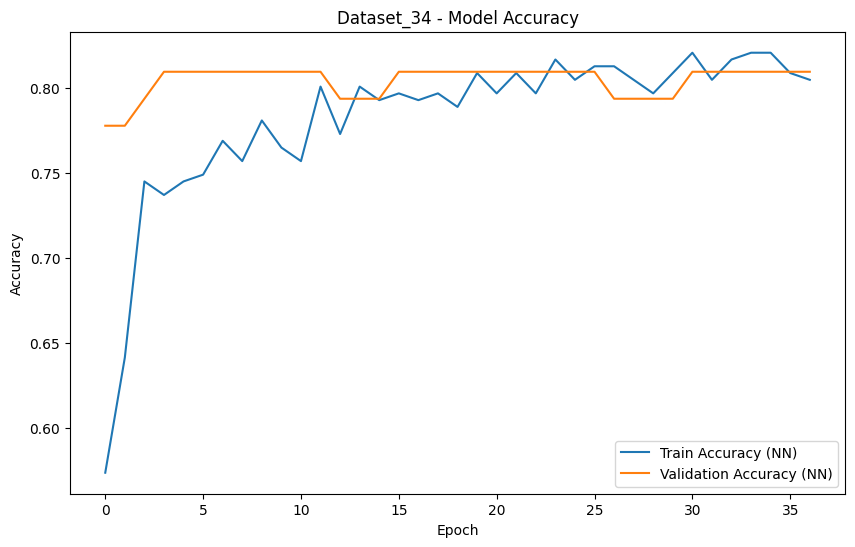

Processing Dataset_35...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5030 - loss: 0.6815 - val_accuracy: 0.6250 - val_loss: 0.6532
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5782 - loss: 0.6505 - val_accuracy: 0.7417 - val_loss: 0.6282
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7098 - loss: 0.6257 - val_accuracy: 0.7500 - val_loss: 0.6061
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.6018 - val_accuracy: 0.7917 - val_loss: 0.5824
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7449 - loss: 0.5888 - val_accuracy: 0.7917 - val_loss: 0.5588
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7347 - loss: 0.5739 - val_accuracy: 0.7917 - val_loss: 0.5359
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.5350 - val_accuracy: 0.7833 - val_loss: 0.5147
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.5365 - val_accuracy: 0.7667 -

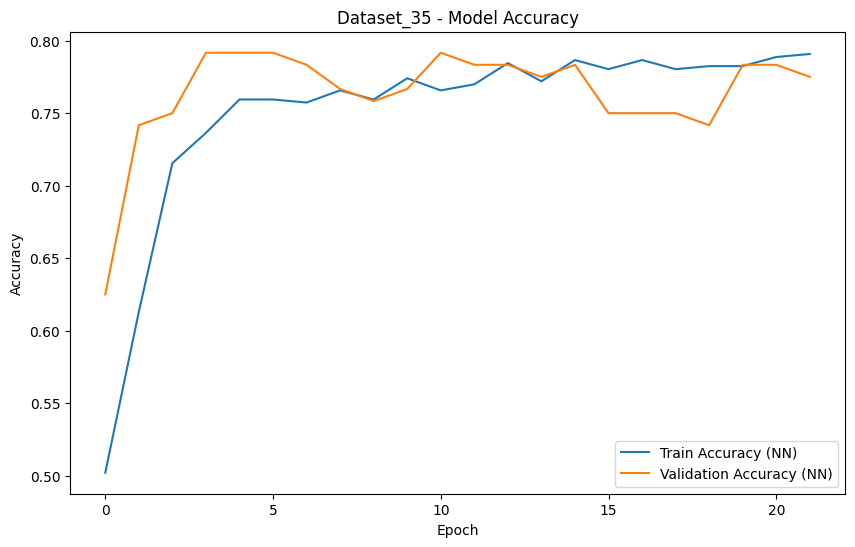

Processing Dataset_36...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5117 - loss: 0.7606 - val_accuracy: 0.4545 - val_loss: 0.7009
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5330 - loss: 0.7076 - val_accuracy: 0.5000 - val_loss: 0.6891
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5867 - loss: 0.6758 - val_accuracy: 0.5000 - val_loss: 0.6758
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6761 - loss: 0.6556 - val_accuracy: 0.5682 - val_loss: 0.6625
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6420 - loss: 0.6263 - val_accuracy: 0.5909 - val_loss: 0.6502
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6721 - loss: 0.6337 - val_accuracy: 0.6364 - val_loss: 0.6392
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7365 - loss: 0.6048 - val_accuracy: 0.6364 - val_loss: 0.6292
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7033 - loss: 0.5940 - val_accuracy: 0.6818 -

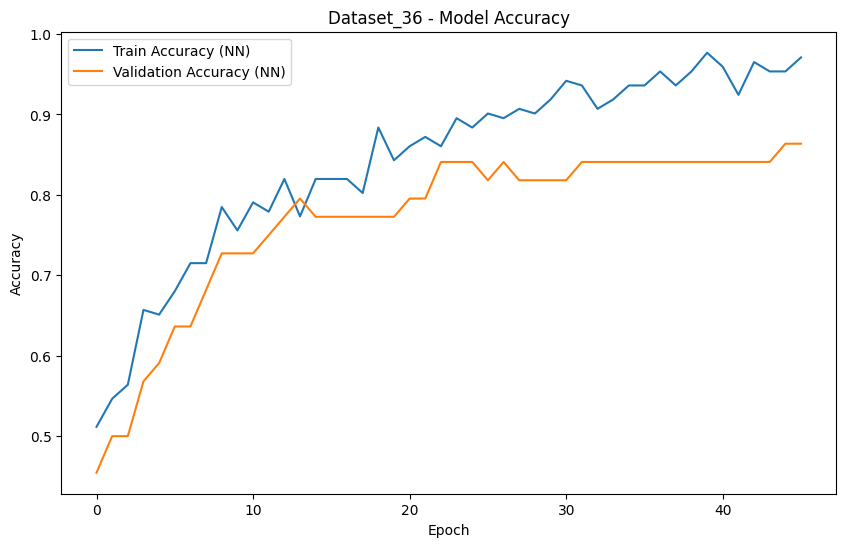

Processing Dataset_37...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5014 - loss: 0.6989 - val_accuracy: 0.5526 - val_loss: 0.6842
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5753 - loss: 0.6712 - val_accuracy: 0.5789 - val_loss: 0.6676
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6813 - loss: 0.6507 - val_accuracy: 0.6842 - val_loss: 0.6517
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7010 - loss: 0.6394 - val_accuracy: 0.7105 - val_loss: 0.6360
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7422 - loss: 0.6207 - val_accuracy: 0.7368 - val_loss: 0.6210
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8141 - loss: 0.5990 - val_accuracy: 0.7632 - val_loss: 0.6065
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7999 - loss: 0.5819 - val_accuracy: 0.7632 - val_loss: 0.5930
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8095 - loss: 0.5634 - val_accuracy: 0.7105 

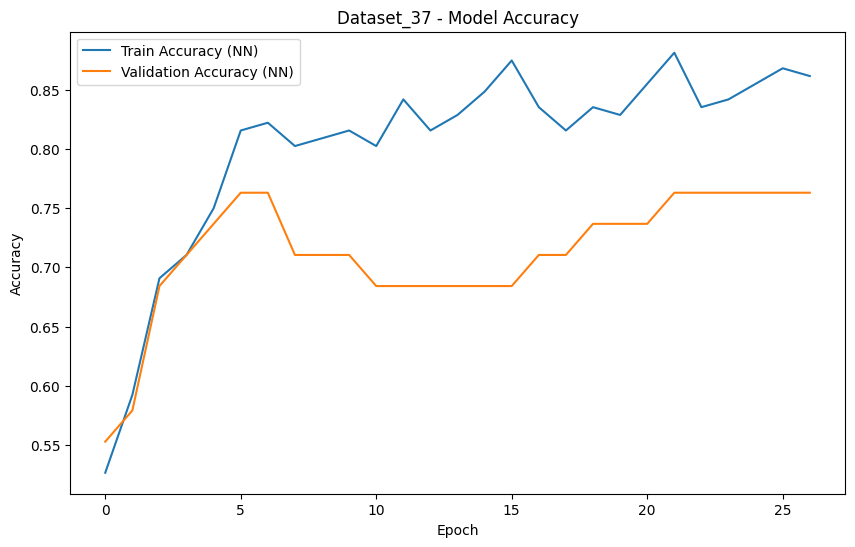

Processing Dataset_38...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5168 - loss: 0.7054 - val_accuracy: 0.7300 - val_loss: 0.6676
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.6747 - val_accuracy: 0.7100 - val_loss: 0.6449
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 0.6598 - val_accuracy: 0.6600 - val_loss: 0.6276
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6074 - loss: 0.6480 - val_accuracy: 0.6600 - val_loss: 0.6136
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6965 - loss: 0.6136 - val_accuracy: 0.6500 - val_loss: 0.6016
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - loss: 0.6235 - val_accuracy: 0.6800 - val_loss: 0.5923
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 0.6091 - val_accuracy: 0.6900 - val_loss: 0.5843
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.5972 - val_accuracy: 0.6900 -

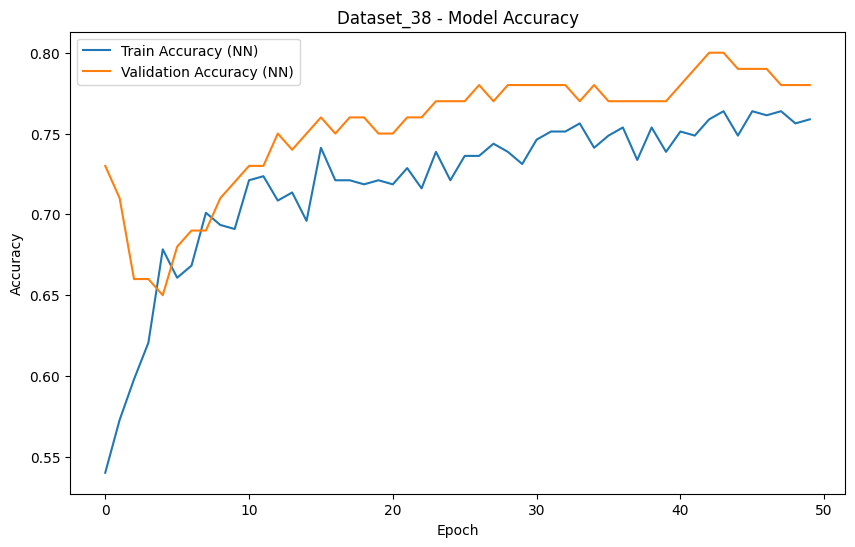

Processing Dataset_39...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5849 - loss: 0.6665 - val_accuracy: 0.8169 - val_loss: 0.5808
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7768 - loss: 0.5760 - val_accuracy: 0.9225 - val_loss: 0.4777
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.4710 - val_accuracy: 0.9577 - val_loss: 0.3830
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9156 - loss: 0.3863 - val_accuracy: 0.9577 - val_loss: 0.2956
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.3202 - val_accuracy: 0.9577 - val_loss: 0.2264
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9403 - loss: 0.2398 - val_accuracy: 0.9577 - val_loss: 0.1789
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9308 - loss: 0.2107 - val_accuracy: 0.9577 - val_loss: 0.1507
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1721 - val_accuracy: 0.9648 -

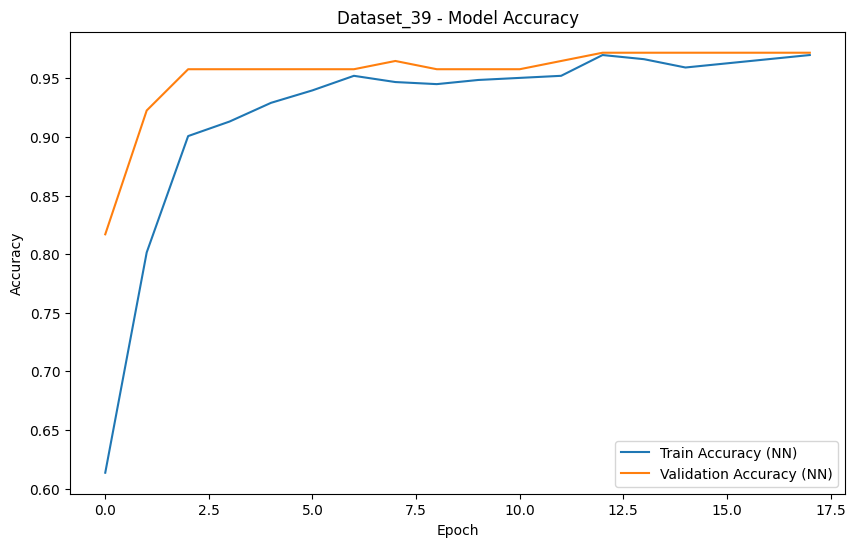

Processing Dataset_4...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5200 - loss: 0.6999 - val_accuracy: 0.5692 - val_loss: 0.6687
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5551 - loss: 0.6721 - val_accuracy: 0.6615 - val_loss: 0.6403
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6558 - val_accuracy: 0.6718 - val_loss: 0.6160
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6846 - loss: 0.6257 - val_accuracy: 0.7026 - val_loss: 0.5901
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6146 - val_accuracy: 0.7077 - val_loss: 0.5660
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6094 - val_accuracy: 0.7128 - val_loss: 0.5455
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5785 - val_accuracy: 0.7128 - val_loss: 0.5261
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 0.5593 - val_accu

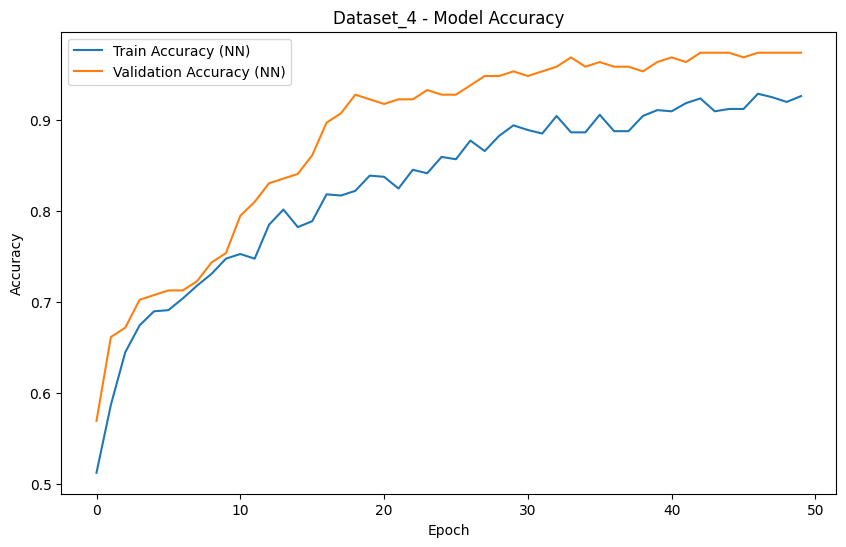

Processing Dataset_40...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6262 - loss: 0.6667 - val_accuracy: 0.6917 - val_loss: 0.6358
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6930 - loss: 0.6281 - val_accuracy: 0.7250 - val_loss: 0.5987
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.5947 - val_accuracy: 0.7250 - val_loss: 0.5662
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.5551 - val_accuracy: 0.7417 - val_loss: 0.5360
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7699 - loss: 0.5381 - val_accuracy: 0.7250 - val_loss: 0.5120
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.5093 - val_accuracy: 0.7333 - val_loss: 0.4924
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.4915 - val_accuracy: 0.7583 - val_loss: 0.4784
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.4900 - val_accuracy: 0.7583 -

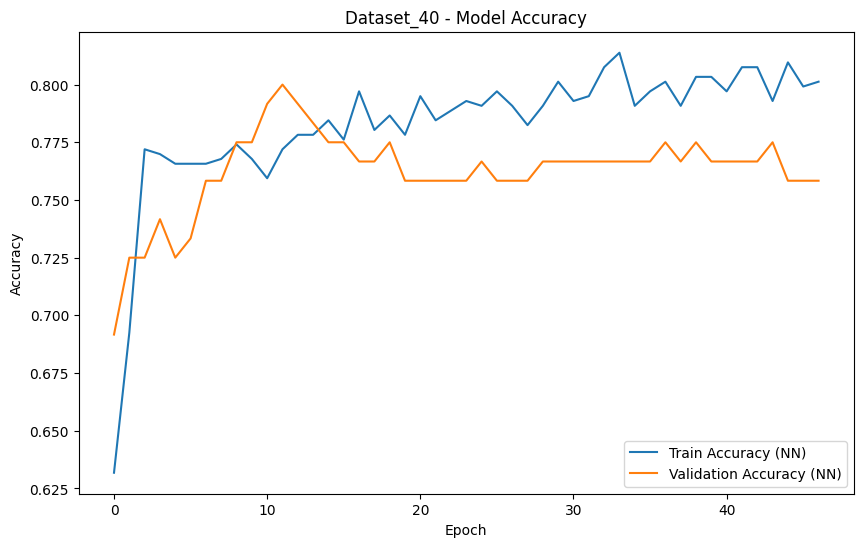

Processing Dataset_41...
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6177 - loss: 0.6763 - val_accuracy: 0.8324 - val_loss: 0.6302
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.6085 - val_accuracy: 0.8555 - val_loss: 0.5499
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.5355 - val_accuracy: 0.8497 - val_loss: 0.4654
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.4556 - val_accuracy: 0.8497 - val_loss: 0.3960
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3833 - val_accuracy: 0.8555 - val_loss: 0.3545
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3769 - val_accuracy: 0.8613 - val_loss: 0.3325
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3350 - val_accuracy: 0.8671 - val_loss: 0.3214
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3458 - val_acc

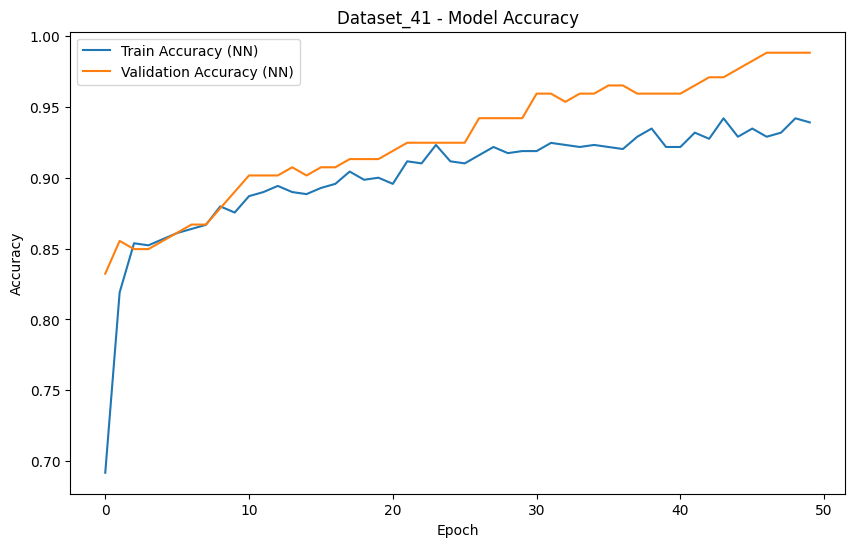

Processing Dataset_42...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5116 - loss: 0.7034 - val_accuracy: 0.3600 - val_loss: 0.7102
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5900 - loss: 0.6715 - val_accuracy: 0.3600 - val_loss: 0.6874
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6773 - loss: 0.6464 - val_accuracy: 0.6000 - val_loss: 0.6656
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6767 - loss: 0.6470 - val_accuracy: 0.7600 - val_loss: 0.6438
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7976 - loss: 0.6138 - val_accuracy: 0.8000 - val_loss: 0.6229
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7909 - loss: 0.6111 - val_accuracy: 0.9200 - val_loss: 0.6025
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8432 - loss: 0.5809 - val_accuracy: 0.9200 - val_loss: 0.5829
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9149 - loss: 0.5660 - val_accuracy: 0

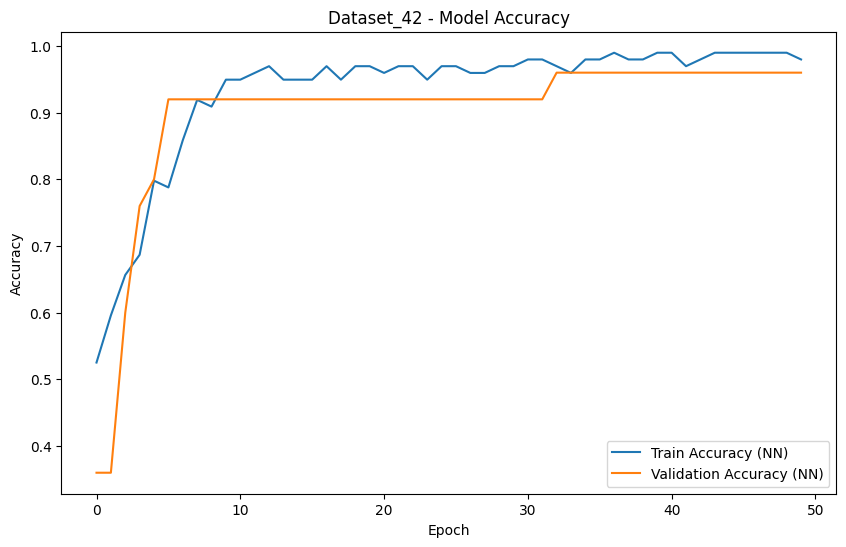

Processing Dataset_43...
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4835 - loss: 0.7134 - val_accuracy: 0.5961 - val_loss: 0.6618
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6755 - val_accuracy: 0.7685 - val_loss: 0.6287
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.6370 - val_accuracy: 0.7931 - val_loss: 0.5922
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7383 - loss: 0.6153 - val_accuracy: 0.7882 - val_loss: 0.5542
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7422 - loss: 0.5821 - val_accuracy: 0.7882 - val_loss: 0.5262
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7360 - loss: 0.5622 - val_accuracy: 0.7882 - val_loss: 0.5103
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7326 - loss: 0.5477 - val_accuracy: 0.7882 - val_loss: 0.5018
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7425 - loss: 0.5323 - val_acc

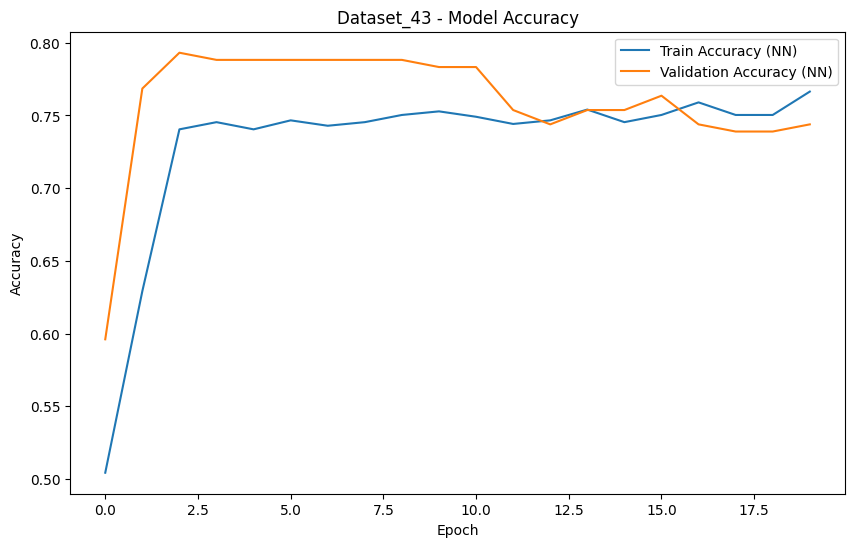

Processing Dataset_44...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5346 - loss: 0.7056 - val_accuracy: 0.6111 - val_loss: 0.6886
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5398 - loss: 0.6896 - val_accuracy: 0.7778 - val_loss: 0.6721
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7102 - loss: 0.6793 - val_accuracy: 0.9444 - val_loss: 0.6576
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7050 - loss: 0.6665 - val_accuracy: 0.9444 - val_loss: 0.6448
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7050 - loss: 0.6649 - val_accuracy: 1.0000 - val_loss: 0.6328
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8251 - loss: 0.6511 - val_accuracy: 1.0000 - val_loss: 0.6209
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7898 - loss: 0.6456 - val_accuracy: 1.0000 - val_loss: 0.6086
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9099 - loss: 0.6301 - val_accuracy: 1

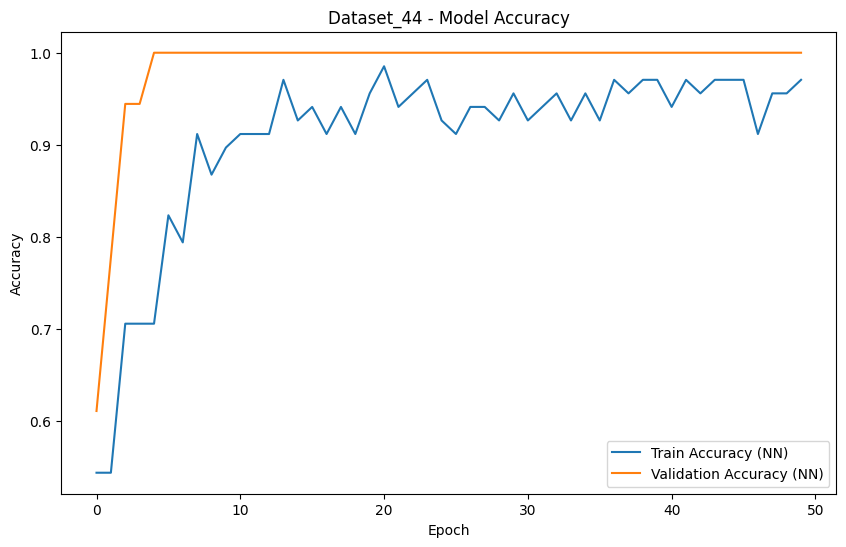

Processing Dataset_45...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2867 - loss: 0.7166 - val_accuracy: 0.5254 - val_loss: 0.6947
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6022 - loss: 0.6788 - val_accuracy: 0.7458 - val_loss: 0.6651
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8559 - loss: 0.6521 - val_accuracy: 0.7966 - val_loss: 0.6367
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8688 - loss: 0.6317 - val_accuracy: 0.8305 - val_loss: 0.6104
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9302 - loss: 0.5971 - val_accuracy: 0.8305 - val_loss: 0.5858
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.5754 - val_accuracy: 0.8475 - val_loss: 0.5604
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9196 - loss: 0.5459 - val_accuracy: 0.8644 - val_loss: 0.5342
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9442 - loss: 0.5077 - val_accuracy: 0.8814 -

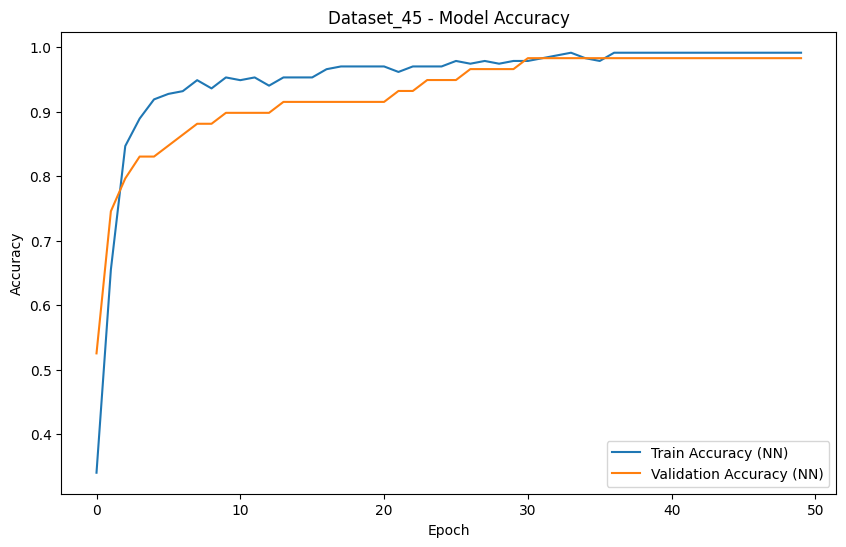

Processing Dataset_46...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4975 - loss: 0.6958 - val_accuracy: 0.5349 - val_loss: 0.6443
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6576 - loss: 0.6453 - val_accuracy: 0.6512 - val_loss: 0.6101
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6625 - loss: 0.6299 - val_accuracy: 0.7442 - val_loss: 0.5781
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7278 - loss: 0.5996 - val_accuracy: 0.8372 - val_loss: 0.5499
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7941 - loss: 0.5679 - val_accuracy: 0.8372 - val_loss: 0.5232
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8010 - loss: 0.5516 - val_accuracy: 0.8605 - val_loss: 0.4982
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7922 - loss: 0.5383 - val_accuracy: 0.8605 - val_loss: 0.4753
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8215 - loss: 0.5185 - val_accuracy: 0.8605 -

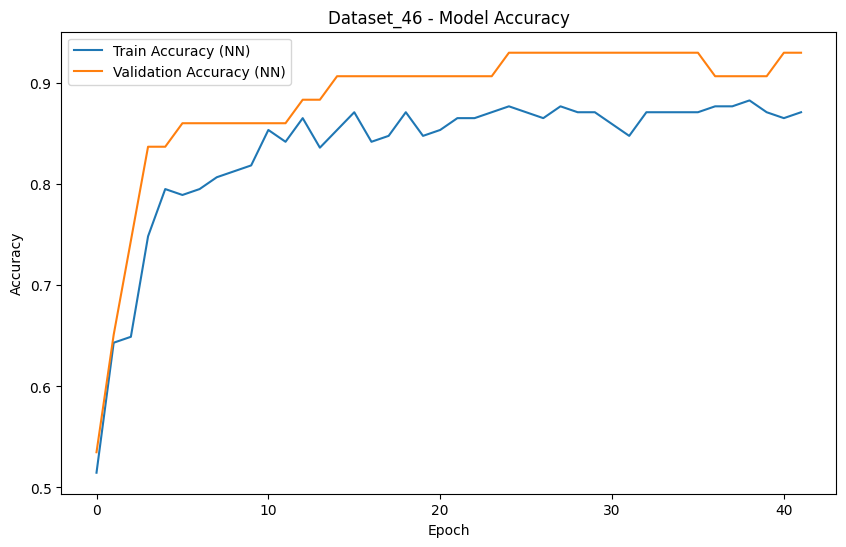

Processing Dataset_47...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5350 - loss: 0.7161 - val_accuracy: 0.5833 - val_loss: 0.6799
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5279 - loss: 0.6990 - val_accuracy: 0.6250 - val_loss: 0.6658
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5123 - loss: 0.7070 - val_accuracy: 0.5833 - val_loss: 0.6546
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5757 - loss: 0.6871 - val_accuracy: 0.6250 - val_loss: 0.6460
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5828 - loss: 0.6879 - val_accuracy: 0.6667 - val_loss: 0.6388
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6339 - loss: 0.6553 - val_accuracy: 0.7500 - val_loss: 0.6320
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7096 - loss: 0.6508 - val_accuracy: 0.7083 - val_loss: 0.6260
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6234 - loss: 0.6732 - val_accuracy: 0

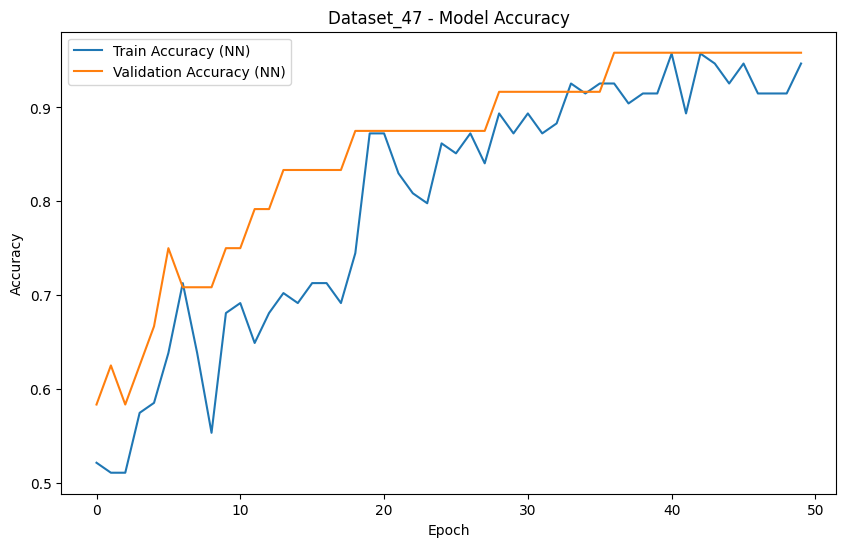

Processing Dataset_48...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5552 - loss: 0.6688 - val_accuracy: 0.7167 - val_loss: 0.6001
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6120 - loss: 0.6348 - val_accuracy: 0.7833 - val_loss: 0.5786
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6102 - loss: 0.6445 - val_accuracy: 0.8000 - val_loss: 0.5567
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7568 - loss: 0.5696 - val_accuracy: 0.8333 - val_loss: 0.5318
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7454 - loss: 0.5616 - val_accuracy: 0.8500 - val_loss: 0.5071
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.5396 - val_accuracy: 0.8667 - val_loss: 0.4821
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8157 - loss: 0.5098 - val_accuracy: 0.9000 - val_loss: 0.4585
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8185 - loss: 0.4819 - val_accuracy: 0.9000 -

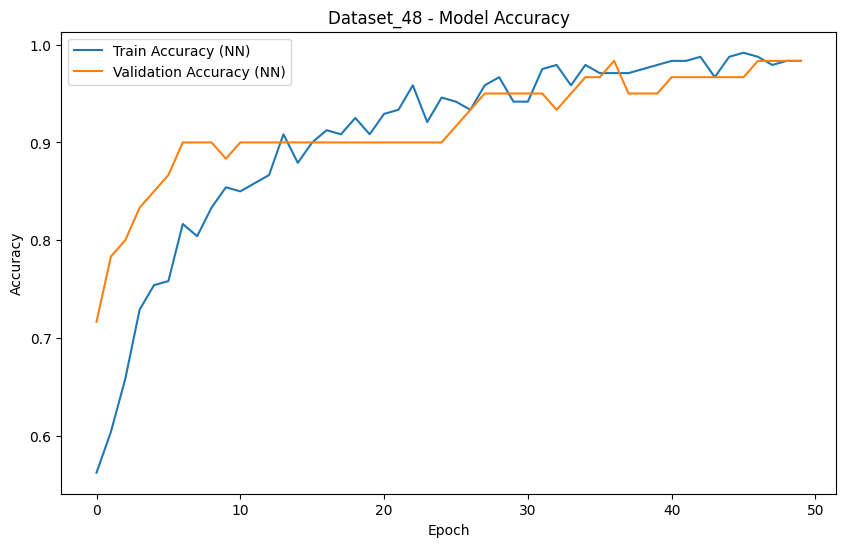

Processing Dataset_49...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4762 - loss: 0.7153 - val_accuracy: 0.8784 - val_loss: 0.4724
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.5028 - val_accuracy: 0.8986 - val_loss: 0.3216
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8527 - loss: 0.3743 - val_accuracy: 0.9257 - val_loss: 0.2376
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8847 - loss: 0.3012 - val_accuracy: 0.9257 - val_loss: 0.1903
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8904 - loss: 0.2711 - val_accuracy: 0.9189 - val_loss: 0.1635
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.2582 - val_accuracy: 0.9189 - val_loss: 0.1509
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9116 - loss: 0.2222 - val_accuracy: 0.9257 - val_loss: 0.1423
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.2376 - val_ac

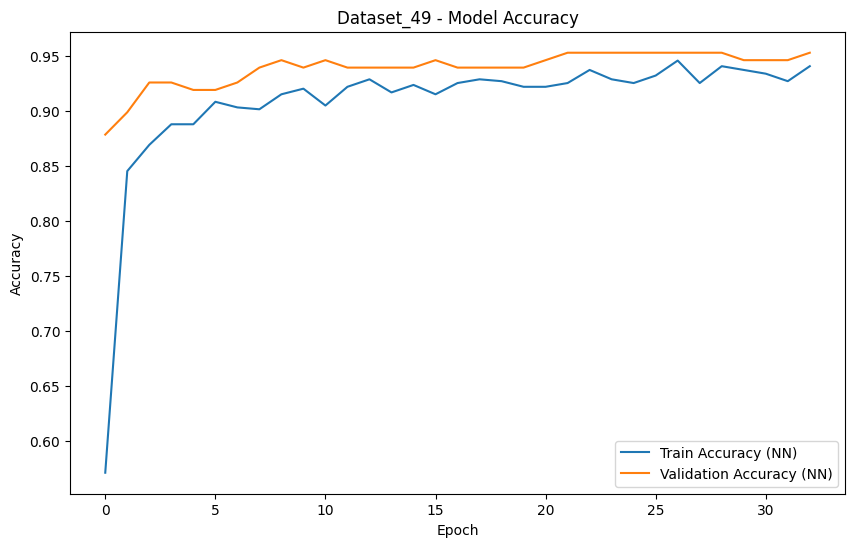

Processing Dataset_5...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6476 - loss: 0.6588 - val_accuracy: 0.8852 - val_loss: 0.6141
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7619 - loss: 0.6213 - val_accuracy: 0.9098 - val_loss: 0.5696
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.5808 - val_accuracy: 0.9262 - val_loss: 0.5202
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8770 - loss: 0.5399 - val_accuracy: 0.9426 - val_loss: 0.4645
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.4926 - val_accuracy: 0.9426 - val_loss: 0.4040
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.4529 - val_accuracy: 0.9426 - val_loss: 0.3445
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9117 - loss: 0.3986 - val_accuracy: 0.9344 - val_loss: 0.2902
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.3517 - val_accuracy: 0.9426 - 

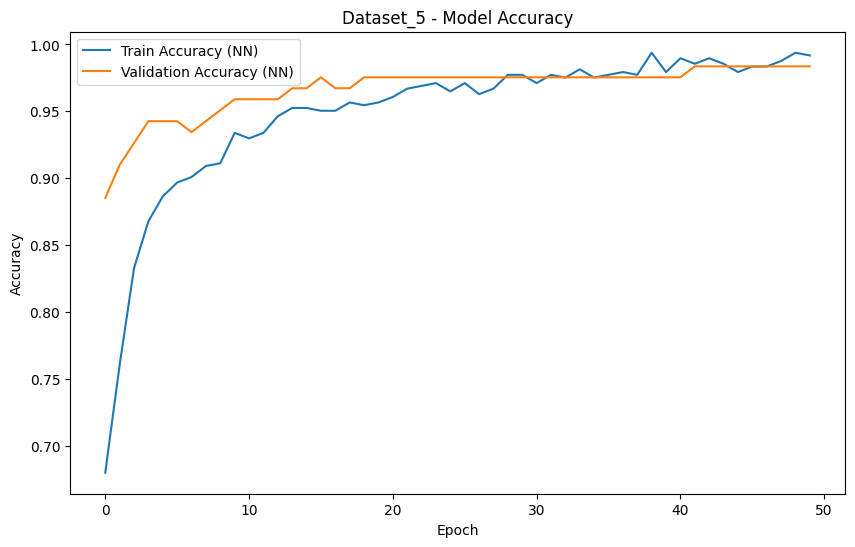

Processing Dataset_6...
Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5906 - loss: 0.6761 - val_accuracy: 0.5921 - val_loss: 0.6459
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.6518 - val_accuracy: 0.8553 - val_loss: 0.6033
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8135 - loss: 0.5999 - val_accuracy: 0.8816 - val_loss: 0.5617
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8504 - loss: 0.5649 - val_accuracy: 0.9079 - val_loss: 0.5208
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8293 - loss: 0.5346 - val_accuracy: 0.9079 - val_loss: 0.4797
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.4849 - val_accuracy: 0.9211 - val_loss: 0.4378
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.4637 - val_accuracy: 0.9342 - val_loss: 0.3967
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8972 - loss: 0.4133 - val_accuracy: 0.9605 - 

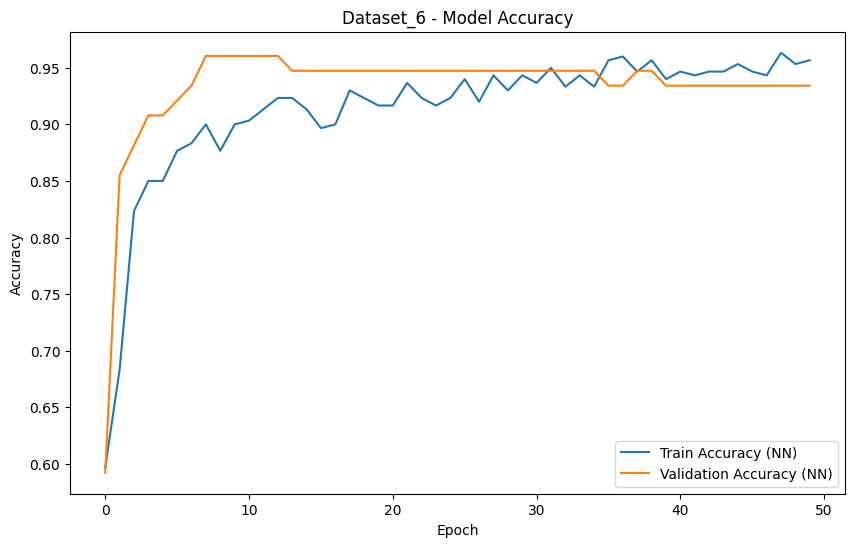

Processing Dataset_7...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4610 - loss: 0.6982 - val_accuracy: 0.8372 - val_loss: 0.6118
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.6138 - val_accuracy: 0.8915 - val_loss: 0.5336
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8028 - loss: 0.5525 - val_accuracy: 0.9147 - val_loss: 0.4621
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.4891 - val_accuracy: 0.9380 - val_loss: 0.3963
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.4351 - val_accuracy: 0.9535 - val_loss: 0.3393
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9108 - loss: 0.3820 - val_accuracy: 0.9612 - val_loss: 0.2862
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9130 - loss: 0.3370 - val_accuracy: 0.9767 - val_loss: 0.2417
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.2766 - val_accuracy: 0.9767 - v

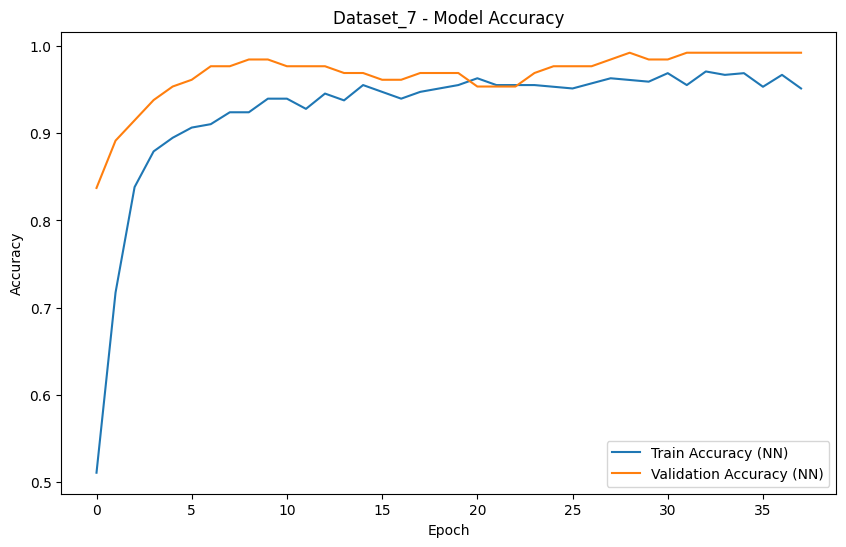

Processing Dataset_8...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4901 - loss: 0.7023 - val_accuracy: 0.6122 - val_loss: 0.6719
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5494 - loss: 0.6888 - val_accuracy: 0.7143 - val_loss: 0.6551
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6086 - loss: 0.6727 - val_accuracy: 0.8367 - val_loss: 0.6392
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6330 - loss: 0.6634 - val_accuracy: 0.8367 - val_loss: 0.6238
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7749 - loss: 0.6479 - val_accuracy: 0.8367 - val_loss: 0.6098
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7349 - loss: 0.6421 - val_accuracy: 0.8980 - val_loss: 0.5964
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.6286 - val_accuracy: 0.8980 - val_loss: 0.5830
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.6142 - val_accuracy: 0.9184 - 

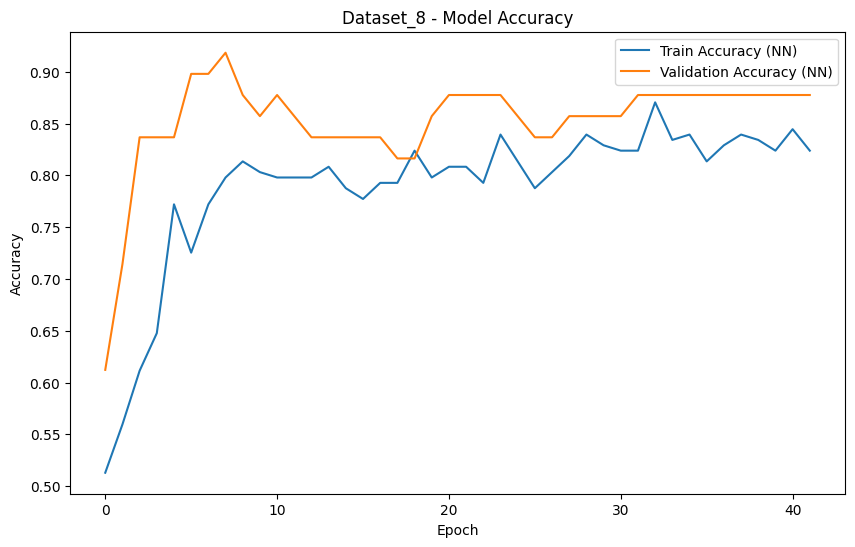

Processing Dataset_9...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4349 - loss: 0.7189 - val_accuracy: 0.6333 - val_loss: 0.6506
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4622 - loss: 0.7084 - val_accuracy: 0.7000 - val_loss: 0.6233
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5056 - loss: 0.6888 - val_accuracy: 0.7333 - val_loss: 0.5979
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6694 - loss: 0.6359 - val_accuracy: 0.8000 - val_loss: 0.5757
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6773 - loss: 0.6187 - val_accuracy: 0.8000 - val_loss: 0.5572
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7420 - loss: 0.5898 - val_accuracy: 0.7667 - val_loss: 0.5407
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7811 - loss: 0.5825 - val_accuracy: 0.7667 - val_loss: 0.5267
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7806 - loss: 0.5451 - val_accuracy: 0.

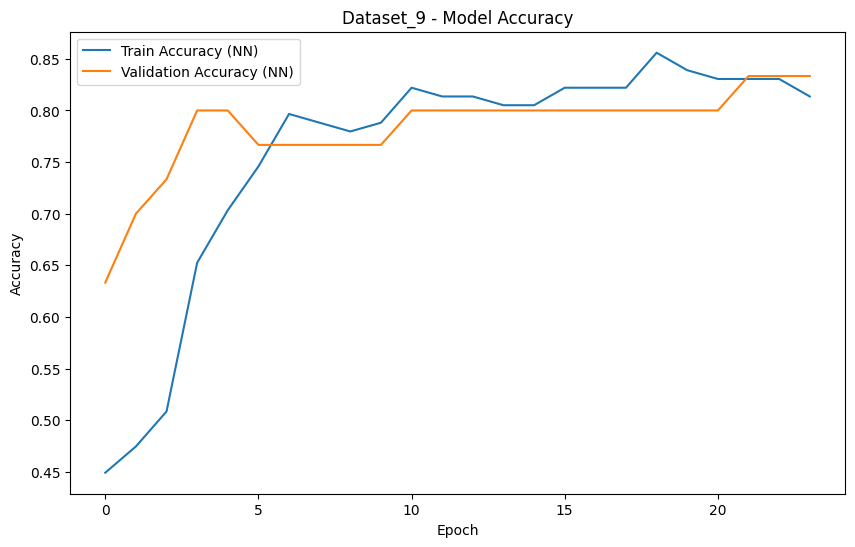

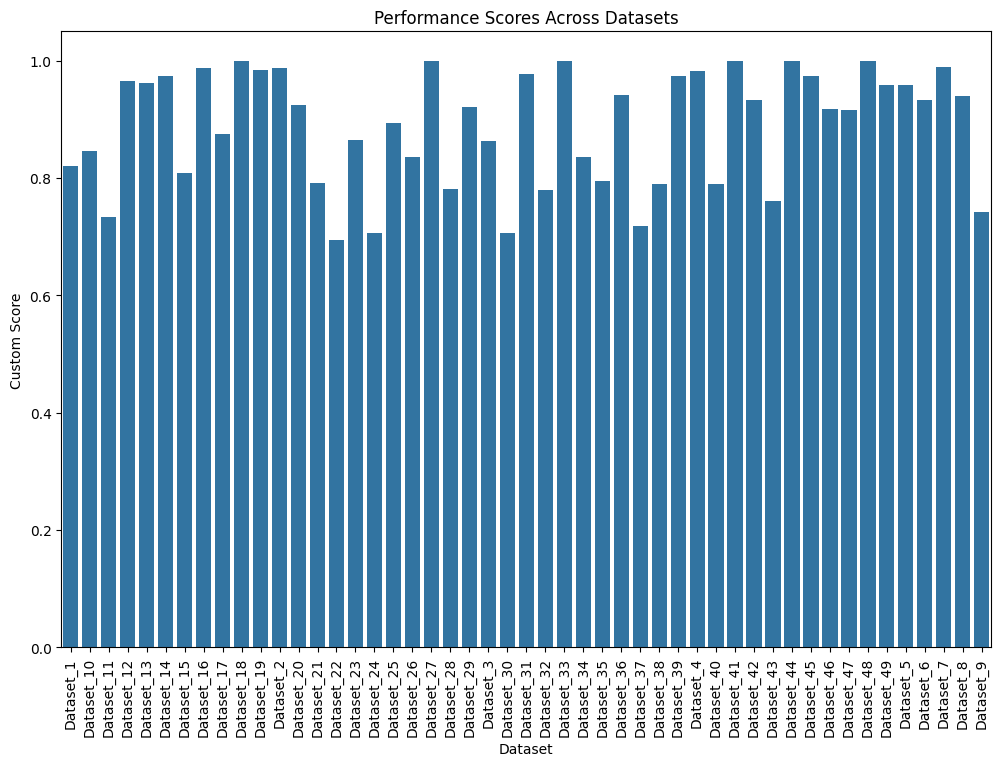

Dataset  Accuracy  Precision  F1 Score     Score
0    Dataset_1  0.841270   0.785714  0.846154  0.820513
1   Dataset_10  0.845455   0.836066  0.857143  0.845205
2   Dataset_11  0.842105   0.625000  0.769231  0.733401
3   Dataset_12  0.977778   0.950000  0.974359  0.965641
4   Dataset_13  0.961538   0.962963  0.962963  0.962536
5   Dataset_14  0.980769   0.964286  0.981818  0.974491
6   Dataset_15  0.810000   0.803922  0.811881  0.808133
7   Dataset_16  0.991304   0.981481  0.990654  0.987180
8   Dataset_17  0.884615   0.857143  0.888889  0.874908
9   Dataset_18  1.000000   1.000000  1.000000  1.000000
10  Dataset_19  0.988095   0.978723  0.989247  0.984692
11   Dataset_2  0.991304   0.981481  0.990654  0.987180
12  Dataset_20  0.945946   0.894737  0.944444  0.925012
13  Dataset_21  0.800000   0.761905  0.820513  0.790916
14  Dataset_22  0.696970   0.652174  0.750000  0.694960
15  Dataset_23  0.873563   0.847826  0.876404  0.864121
16  Dataset_24  0.719298   0.669903  0.741935  0.706331
17  Dataset_25  0.914286   0.857143  0.923077  0.894066
18  Dataset_26  0.847826   0.800000  0.872727  0.836166
19  Dataset_27  1.000000   1.000000  1.000000  1.000000
20  Dataset_28  0.783333   0.785714  0.771930  0.780865
21  Dataset_29  0.928571   0.911765  0.925373  0.920889
22   Dataset_3  0.857143   0.833333  0.909091  0.863203
23  Dataset_30  0.732394   0.686567  0.707692  0.706653
24  Dataset_31  0.958333   1.000000  0.965517  0.977155
25  Dataset_32  0.788177   0.744186  0.817021  0.779234
26  Dataset_33  1.000000   1.000000  1.000000  1.000000
27  Dataset_34  0.841270   0.823529  0.848485  0.836338
28  Dataset_35  0.808333   0.769231  0.813008  0.794095
29  Dataset_36  0.954545   0.920000  0.958333  0.941864
30  Dataset_37  0.736842   0.681818  0.750000  0.718780
31  Dataset_38  0.780000   0.808511  0.775510  0.790057
32  Dataset_39  0.978873   0.969231  0.976744  0.974378
33   Dataset_4  0.984615   0.980583  0.985366  0.983227
34  Dataset_40  0.800000   0.774194  0.800000  0.789677
35  Dataset_41  1.000000   1.000000  1.000000  1.000000
36  Dataset_42  0.960000   0.900000  0.947368  0.932211
37  Dataset_43  0.768473   0.721805  0.803347  0.760268
38  Dataset_44  1.000000   1.000000  1.000000  1.000000
39  Dataset_45  0.983051   0.962963  0.981132  0.974440
40  Dataset_46  0.906977   0.944444  0.894737  0.918292
41  Dataset_47  0.916667   0.916667  0.916667  0.916667
42  Dataset_48  1.000000   1.000000  1.000000  1.000000
43  Dataset_49  0.959459   0.958904  0.958904  0.959071
44   Dataset_5  0.967213   0.946429  0.963636  0.957826
45   Dataset_6  0.947368   0.909091  0.952381  0.933561
46   Dataset_7  0.992248   0.983333  0.991597  0.988487
47   Dataset_8  0.938776   0.933333  0.949153  0.939712
48   Dataset_9  0.800000   0.692308  0.750000  0.741923

In [3]:


# Function to load data from each dataset
def load_data(dataset_path):
    x_train = pd.read_csv(os.path.join(dataset_path, 'X_train.csv'))
    y_train = pd.read_csv(os.path.join(dataset_path, 'y_train.csv'))
    x_test = pd.read_csv(os.path.join(dataset_path, 'X_test.csv'))
    return x_train, y_train['target'], x_test

# Initialize lists to store results
scores = []
folders = sorted(os.listdir(main_dir))

for folder in folders:
    print(f"Processing {folder}...")
    dataset_path = os.path.join(main_dir, folder)
    
    # Load X_train, y_train, and X_test
    X_train, y_train, X_test = load_data(dataset_path)

    # Feature selection with SelectFromModel using Gradient Boosting
    selector = SelectFromModel(GradientBoostingClassifier(n_estimators=50, random_state=42), threshold='median')
    X_train = selector.fit_transform(X_train, y_train)
    X_test = selector.transform(X_test)

    # Handle class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    # Scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Split the training data for validation
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train Neural Network independently
    model_nn = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history_nn = model_nn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

    # Train Gradient Boosting model independently
    model_gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
    model_gb.fit(X_train, y_train)

    # Train Logistic Regression model independently
    model_lr = LogisticRegression(max_iter=1000, random_state=42)
    model_lr.fit(X_train, y_train)

    # Train Random Forest model independently
    model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
    model_rf.fit(X_train, y_train)
    
    # FIXME: Lower Score
    # Train Support Vector Machine (SVM) model independently
    # model_svm = SVC(kernel='rbf', random_state=42)
    # model_svm.fit(X_train, y_train)

    # FIXME: Lower Score
    # Train K-Nearest Neighbors (KNN) model independently
    # model_knn = KNeighborsClassifier(n_neighbors=5)
    # model_knn.fit(X_train, y_train)

    # Get validation predictions for each model
    #y_val_pred_nn = (model_nn.predict(X_val) > 0.5).astype(int).flatten()
    y_val_pred_nn = (model_nn.predict(X_val) > 0.5).astype(float).flatten()
    y_val_pred_gb = model_gb.predict(X_val)
    y_val_pred_lr = model_lr.predict(X_val)
    y_val_pred_rf = model_rf.predict(X_val)
    # y_val_pred_svm = model_svm.predict(X_val)
    # y_val_pred_knn = model_knn.predict(X_val)

    # Ensemble by averaging predictions
    # y_val_pred_ensemble = (y_val_pred_nn + y_val_pred_gb + y_val_pred_lr >= 2).astype(int)
    y_val_pred_ensemble = (y_val_pred_nn + y_val_pred_gb + y_val_pred_lr + y_val_pred_rf >= 2).astype(int)
    # y_val_pred_ensemble = (y_val_pred_nn + y_val_pred_gb + y_val_pred_lr + y_val_pred_rf + y_val_pred_svm >= 3).astype(int)
    # y_val_pred_ensemble = (y_val_pred_nn + y_val_pred_gb + y_val_pred_lr + y_val_pred_rf + y_val_pred_svm + y_val_pred_knn >= 3).astype(int)
    # y_val_pred_ensemble = (y_val_pred_nn + y_val_pred_gb + y_val_pred_lr + y_val_pred_rf + y_val_pred_knn >= 3).astype(int)

    # Evaluate the ensemble model
    accuracy = accuracy_score(y_val, y_val_pred_ensemble)
    precision = precision_score(y_val, y_val_pred_ensemble)
    f1 = f1_score(y_val, y_val_pred_ensemble)

    # Calculate custom score
    score = accuracy * 0.3 + precision * 0.4 + f1 * 0.3
    scores.append({'Dataset': folder, 'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1, 'Score': score})

    # Predict on the test set and save ensemble results
    #y_test_pred_nn = (model_nn.predict(X_test) > 0.5).astype(int).flatten()
    y_test_pred_nn = (model_nn.predict(X_test) > 0.5).astype(float).flatten()
    y_test_pred_gb = model_gb.predict(X_test)
    y_test_pred_lr = model_lr.predict(X_test)
    y_test_pred_rf = model_rf.predict(X_test)
    # y_test_pred_svm = model_svm.predict(X_test)
    # y_test_pred_knn = model_knn.predict(X_test)

    # y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr >= 2).astype(int)
    # y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr + y_test_pred_rf >= 2).astype(int)
    y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr + y_test_pred_rf >= 2).astype(float)
    # y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr + y_test_pred_rf + y_test_pred_svm >= 3).astype(int)
    # y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr + y_test_pred_rf + y_test_pred_svm + y_test_pred_knn >= 3).astype(int)
    #y_test_pred_ensemble = (y_test_pred_nn + y_test_pred_gb + y_test_pred_lr + y_test_pred_rf + y_test_pred_knn >= 3).astype(int)
    
    y_test_pred_df = pd.DataFrame(y_test_pred_ensemble, columns=['Prediction'])
    y_test_pred_df.to_csv(os.path.join(dataset_path, 'y_predict.csv'), index=False)

    # Plot metrics
    plt.figure(figsize=(10, 6))
    plt.plot(history_nn.history['accuracy'], label='Train Accuracy (NN)')
    plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy (NN)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{folder} - Model Accuracy')
    plt.show()

# Display final scores for each dataset
scores_df = pd.DataFrame(scores)

# Visualization of the score performance across datasets
plt.figure(figsize=(12, 8))
sns.barplot(x='Dataset', y='Score', data=scores_df)
plt.xlabel('Dataset')
plt.ylabel('Custom Score')
plt.title('Performance Scores Across Datasets')
plt.xticks(rotation=90)
plt.show()

scores_df